# Installazione Pacchetti

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importazione dataset

In [99]:
method_name = 'K-means (k=50) with stretched coordinates version 3'
#Importazione dataset
df = pd.read_csv('clustering_methods_performances/k-means_stretched_v3(k=50).csv')
#Stampa le prime righe per verifica
print(df.head())
print(df.columns)


   Unnamed: 0    cluster  weekday weekday_name  min_minutes  max_minutes  \
0           0  Cluster 1        0       Lunedì         90.0        152.0   
1           1  Cluster 1        1      Martedì        112.0        223.0   
2           2  Cluster 1        2    Mercoledì        178.0        371.0   
3           3  Cluster 1        3      Giovedì         94.0        166.0   
4           4  Cluster 1        4      Venerdì        124.0        209.0   

   mean_minutes  min_distance_m  max_distance_m  mean_distance_m  ...  \
0    117.964286         93246.0        115603.0    108660.821429  ...   
1    140.896552         96930.0        115926.0    106819.482759  ...   
2    296.310345        118765.0        130712.0    125370.172414  ...   
3    110.307692         97352.0        111364.0    104642.692308  ...   
4    165.392857         98028.0        120596.0    110610.321429  ...   

   min_unloading_time_min  max_unloading_time_min  mean_unloading_time_min  \
0                    10.0 

In [100]:
# Conversione dei giorni della settimana in inglese
# Dizionario di traduzione italiano -> inglese
traduzione_giorni = {
    "Lunedì": "Mon",
    "Martedì": "Tues",
    "Mercoledì": "Wed",
    "Giovedì": "Thurs",
    "Venerdì": "Fri",
    "Sabato": "Sat",
    "Domenica": "Sun"
}

# Sostituisci i nomi dei giorni
df["weekday_name"] = df["weekday_name"].replace(traduzione_giorni)


# Grafici 

## Analisi preliminari

       cluster  total_days
0    Cluster 1         127
1   Cluster 10         136
2   Cluster 11          57
3   Cluster 12         144
4   Cluster 13         120
5   Cluster 14          73
6   Cluster 15         133
7   Cluster 16         143
8   Cluster 17         137
9   Cluster 18         143
10  Cluster 19          61
11   Cluster 2         143
12  Cluster 20         143
13  Cluster 21         105
14  Cluster 22         144
15  Cluster 23          72
16  Cluster 24          56
17  Cluster 25         143
18  Cluster 26         140
19  Cluster 27         143
20  Cluster 28          91
21  Cluster 29         143
22   Cluster 3          80
23  Cluster 30         143
24  Cluster 31         142
25  Cluster 32          74
26  Cluster 33          65
27  Cluster 34          41
28  Cluster 35         140
29  Cluster 36         142
30  Cluster 37          31
31  Cluster 38         143
32  Cluster 39         143
33   Cluster 4         143
34  Cluster 40         143
35  Cluster 41          76
3

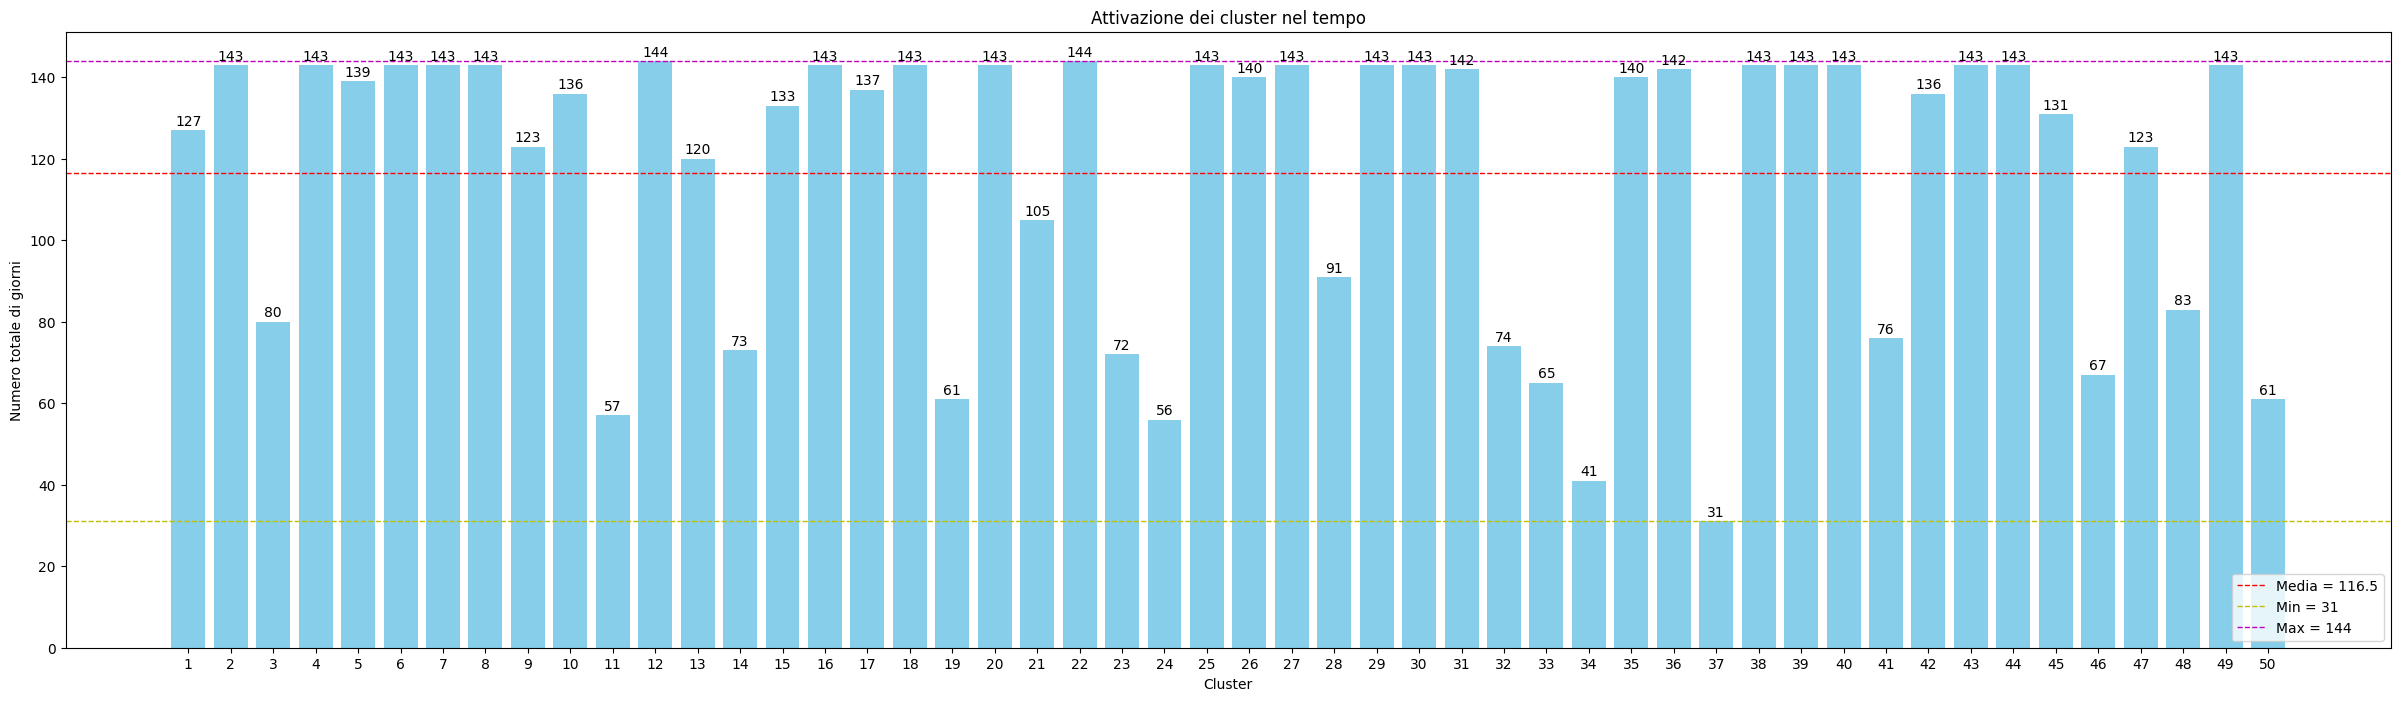

In [101]:
# =========================
# Calcolo numero totale di giorni per cluster
# =========================
cluster_days = df.groupby("cluster")["n_days"].sum().reset_index(name="total_days")
print(cluster_days)

# =========================
# Estrai numero dal nome del cluster se è una stringa tipo "Cluster 1"
# =========================
cluster_days["cluster_num"] = cluster_days["cluster"].str.extract(r'(\d+)').astype(int)

# Ordina per cluster numerico crescente
cluster_days = cluster_days.sort_values("cluster_num")

# =========================
# Plot a barre
# =========================
plt.figure(figsize=(30,8))
x_pos = range(1, len(cluster_days)+1)
y_values = cluster_days["total_days"]

bars = plt.bar(x_pos, y_values, color='skyblue')

# Aggiungi etichette sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)),
             ha='center', va='bottom', fontsize=10)

# Etichette e titolo
plt.xticks(ticks=x_pos, labels=cluster_days["cluster_num"], rotation=0)
plt.xlabel('Cluster')
plt.ylabel('Numero totale di giorni')
plt.title('Attivazione dei cluster nel tempo')

# Linee media, min, max
mean_val = y_values.mean()
min_val = y_values.min()
max_val = y_values.max()

plt.axhline(mean_val, color='r', linestyle='dashed', linewidth=1, label=f'Media = {mean_val:.1f}')
plt.axhline(min_val, color='y', linestyle='dashed', linewidth=1, label=f'Min = {min_val}')
plt.axhline(max_val, color='m', linestyle='dashed', linewidth=1, label=f'Max = {max_val}')

plt.legend(loc='lower right')
plt.show()

### Giorni di attivazione

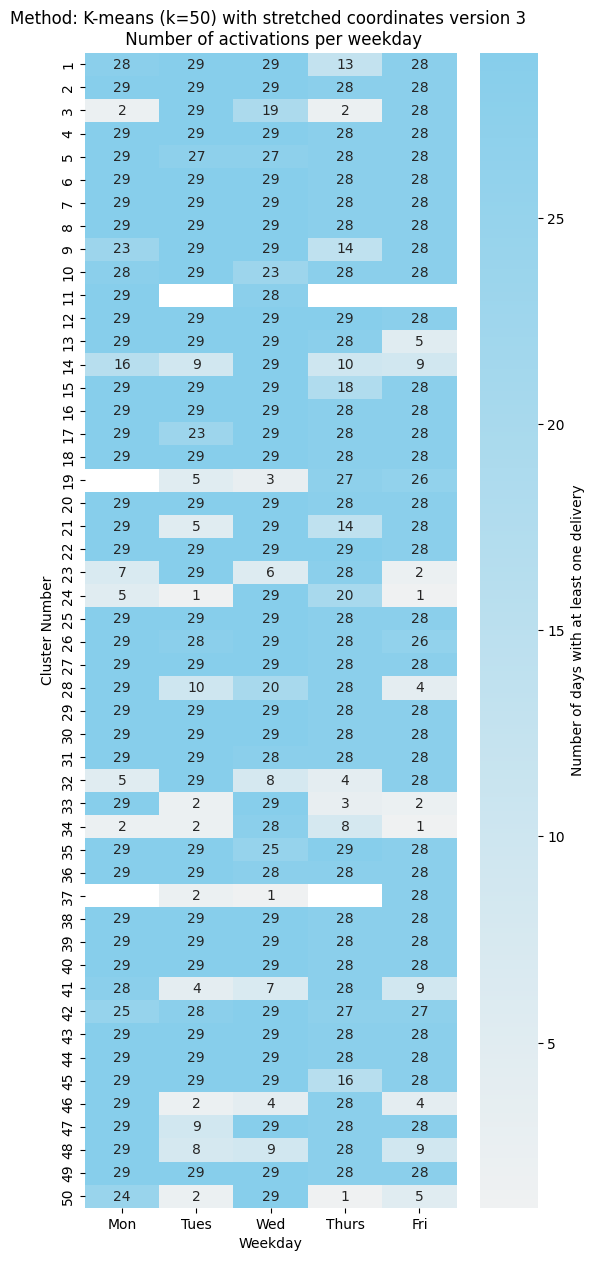

In [102]:
# =========================
# HEATMAP: Numero di giorni di attivazione per cluster e giorno
# =========================
# Visualizza quante volte ogni cluster è attivo in ciascun giorno della settimana (Lun-Ven)


# Filtriamo solo i giorni lavorativi
df_days = df[~df["weekday_name"].isin(["Sat", "Sun"])].copy()


# Estraiamo il numero del cluster
df_days["cluster_num"] = df_days["cluster"].str.extract(r'(\d+)').astype(int)


# Creiamo la pivot table: righe = cluster, colonne = giorno, valori = n_days
heatmap_data = df_days.pivot_table(
    index="cluster_num",
    columns="weekday_name",
    values="n_days",
    aggfunc="sum" # sommiamo i giorni se ci sono più righe per lo stesso cluster/giorno
)


# Ordiniamo i giorni correttamente
giorni_ordine = ["Mon", "Tues", "Wed", "Thurs", "Fri"]
heatmap_data = heatmap_data[giorni_ordine]


# Plot della heatmap
plt.figure(figsize=(6,15))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap=sns.light_palette("skyblue", as_cmap=True),
    cbar_kws={'label': 'Number of days with at least one delivery'}
)
plt.title(f"Method: {method_name} \n Number of activations per weekday")
plt.xlabel("Weekday")
plt.ylabel("Cluster Number")
plt.show()

## Grafici base

### Mean number of deliveries

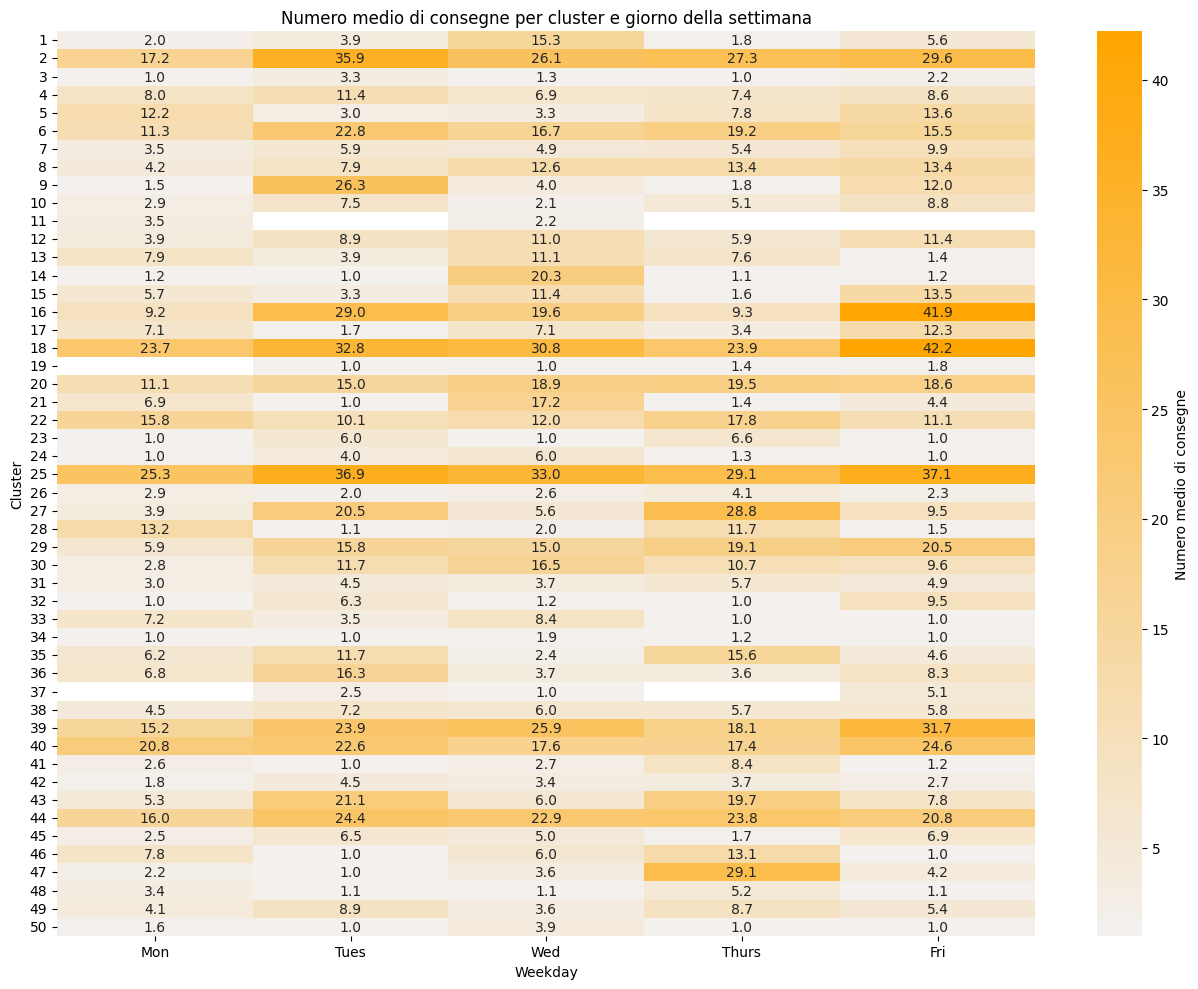

In [103]:
# =========================
# HEATMAP: mean_num_deliveries per cluster e giorno della settimana
# =========================

# 1. Escludiamo Sabato e Domenica
df_filtered = df[~df["weekday_name"].isin(["Sabato", "Domenica"])].copy()

# 2. Estraiamo il numero dal nome del cluster (es: "Cluster 10" -> 10)
df_filtered["cluster_num"] = df_filtered["cluster"].str.extract(r'(\d+)').astype(int)


# 4. Creiamo la pivot table SENZA ricalcolare le medie
heatmap_data = df_filtered.pivot_table(
    index="cluster_num",         # ogni riga = cluster numerico
    columns="weekday_name",      # ogni colonna = giorno della settimana
    values="mean_num_deliveries" # valore già calcolato
)[giorni_ordine]  # ordiniamo le colonne secondo i giorni

# =========================
# Plot della heatmap
# =========================
plt.figure(figsize=(13, 10))  # dimensione figura

sns.heatmap(
    heatmap_data,
    annot=True,                  # mostra i valori nelle celle
    fmt=".1f",                    # formato decimale
    cmap=sns.light_palette("orange", as_cmap=True),
    cbar_kws={'label': 'Numero medio di consegne'}
)

plt.title("Numero medio di consegne per cluster e giorno della settimana")
plt.xlabel("Weekday")
plt.ylabel("Cluster")

plt.tight_layout()
plt.show()


C:\Users\nicco\AppData\Local\Temp\ipykernel_24288\1001860601.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["mean_num_deliveries"] * x["n_days"]).sum() / x["n_days"].sum())


    cluster_num  weighted_mean_num_deliveries
0             1                      6.259843
1             2                     27.216783
2             3                      2.337500
3             4                      8.482517
4             5                      8.100719
5             6                     17.111888
6             7                      5.895105
7             8                     10.272727
8             9                     10.341463
9            10                      5.411765
10           11                      2.859649
11           12                      8.187500
12           13                      7.366667
13           14                      8.739726
14           15                      7.511278
15           16                     21.727273
16           17                      6.503650
17           18                     30.636364
18           19                      1.508197
19           20                     16.594406
20           21                   

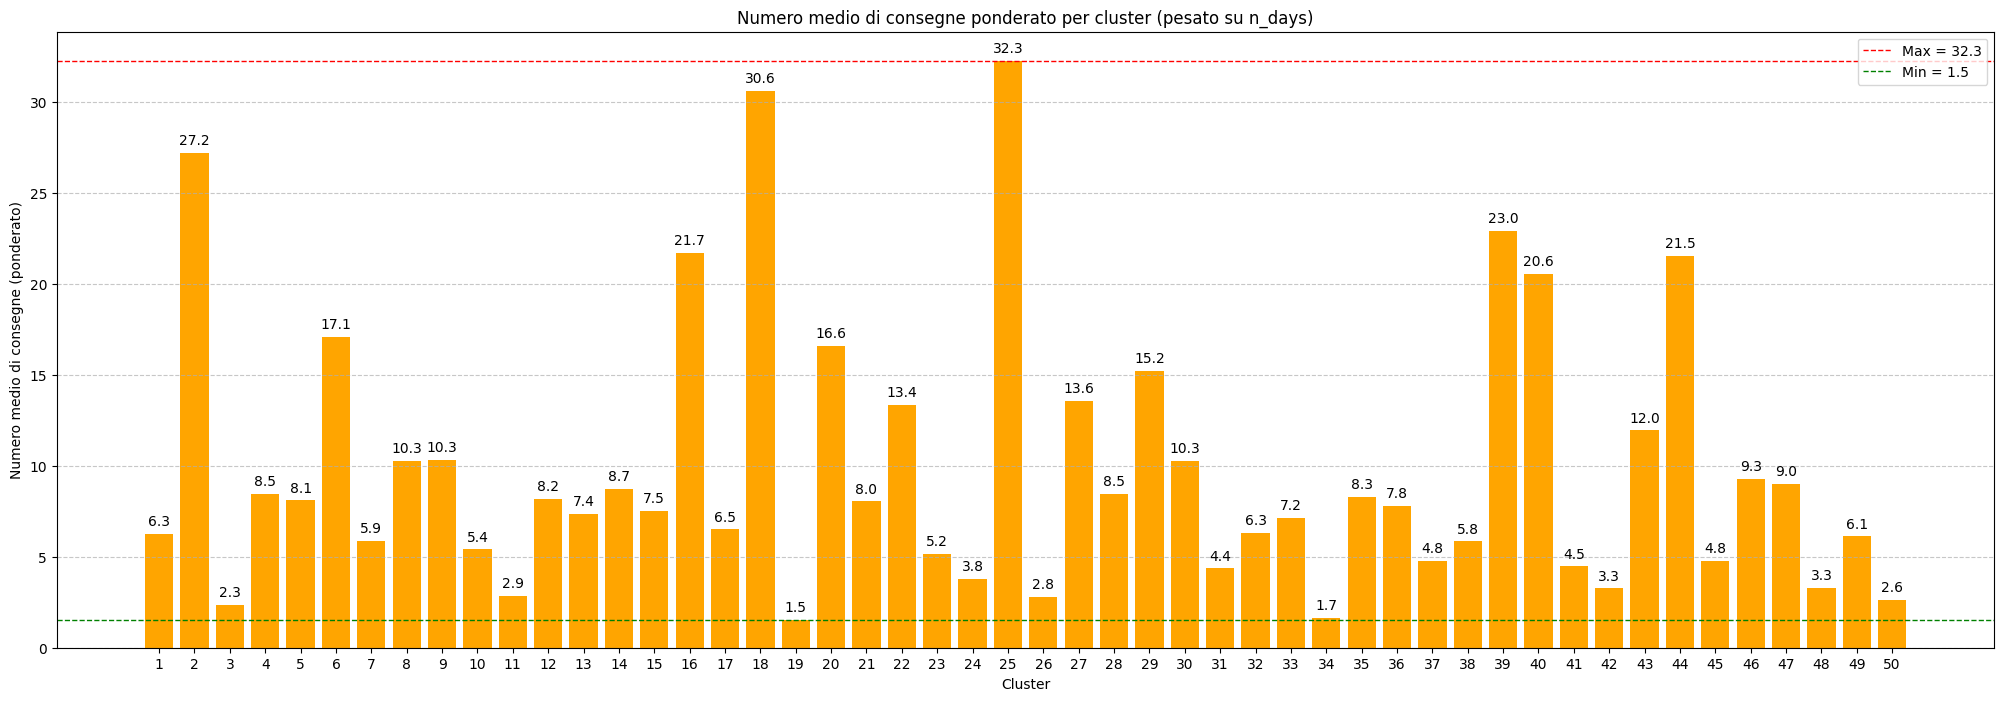

In [104]:
# =========================
# mean_num_deliveries PER CLUSTER
# =========================

# 1. Filtriamo solo i giorni lavorativi (Lun-Ven)
df_filtered = df[~df["weekday_name"].isin(["Sabato", "Domenica"])].copy()

# 2. Estraiamo il numero dal nome del cluster (es: "Cluster 10" -> 10)
df_filtered["cluster_num"] = df_filtered["cluster"].str.extract(r'(\d+)').astype(int)

# 3. Calcolo media ponderata per ogni cluster
# Formula: sum(mean_num_deliveries * n_days) / sum(n_days)


weighted_mean_deliveries = (
    df_filtered.groupby("cluster_num")
    .apply(lambda x: (x["mean_num_deliveries"] * x["n_days"]).sum() / x["n_days"].sum())
    .reset_index(name="weighted_mean_num_deliveries")
)




# 4. Ordiniamo i cluster numericamente
weighted_mean_deliveries = weighted_mean_deliveries.sort_values("cluster_num")

# =========================
# OUTPUT RISULTATO
# =========================
print(weighted_mean_deliveries)

# =========================
# PLOT RISULTATO
# =========================
plt.figure(figsize=(25,8))
x = weighted_mean_deliveries["cluster_num"]
y = weighted_mean_deliveries["weighted_mean_num_deliveries"]

bars = plt.bar(x, y, color='orange')

# Etichette sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{height:.1f}', 
             ha='center', va='bottom', fontsize=10)
max_val = y.max()
plt.axhline(max_val, color='r', linestyle='dashed', linewidth=1, label=f'Max = {max_val:.1f}')
min_val = y.min()
plt.axhline(min_val, color='g', linestyle='dashed', linewidth=1, label=f'Min = {min_val:.1f}')
plt.legend(loc='upper right')

plt.xlabel("Cluster")
plt.ylabel("Numero medio di consegne (ponderato)")
plt.title("Numero medio di consegne ponderato per cluster (pesato su n_days)")
plt.xticks(x, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Media minuti

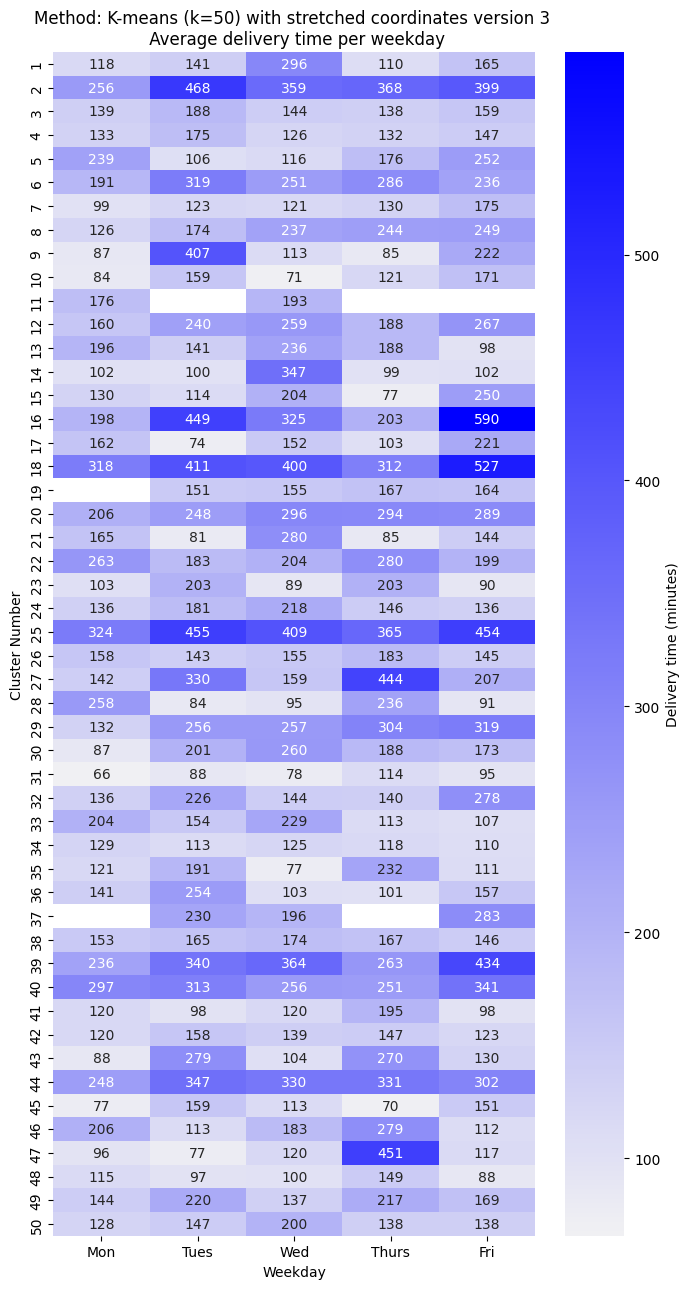

In [105]:
# =========================
# HEATMAP: mean_minutes per cluster e giorno della settimana
# =========================


# Filtriamo solo giorni lavorativi
df_filtered = df[~df["weekday_name"].isin(["Sabato", "Domenica"])].copy()


# Estraiamo il numero del cluster
df_filtered["cluster_num"] = df_filtered["cluster"].str.extract(r'(\d+)').astype(int)



# Pivot table senza ricalcolare le medie
heatmap_data = df_filtered.pivot_table(
    index="cluster_num",
    columns="weekday_name",
    values="mean_minutes"
)[giorni_ordine]


# Plot della heatmap
plt.figure(figsize=(7,13))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap=sns.light_palette("blue", as_cmap=True),
    cbar_kws={'label': 'Delivery time (minutes)'}
)
plt.title(f"Method: {method_name} \n Average delivery time per weekday")
plt.xlabel("Weekday")
plt.ylabel("Cluster Number")
plt.tight_layout()
plt.show()

C:\Users\nicco\AppData\Local\Temp\ipykernel_24288\2283951030.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["mean_minutes"] * x["n_days"]).sum() / x["n_days"].sum())


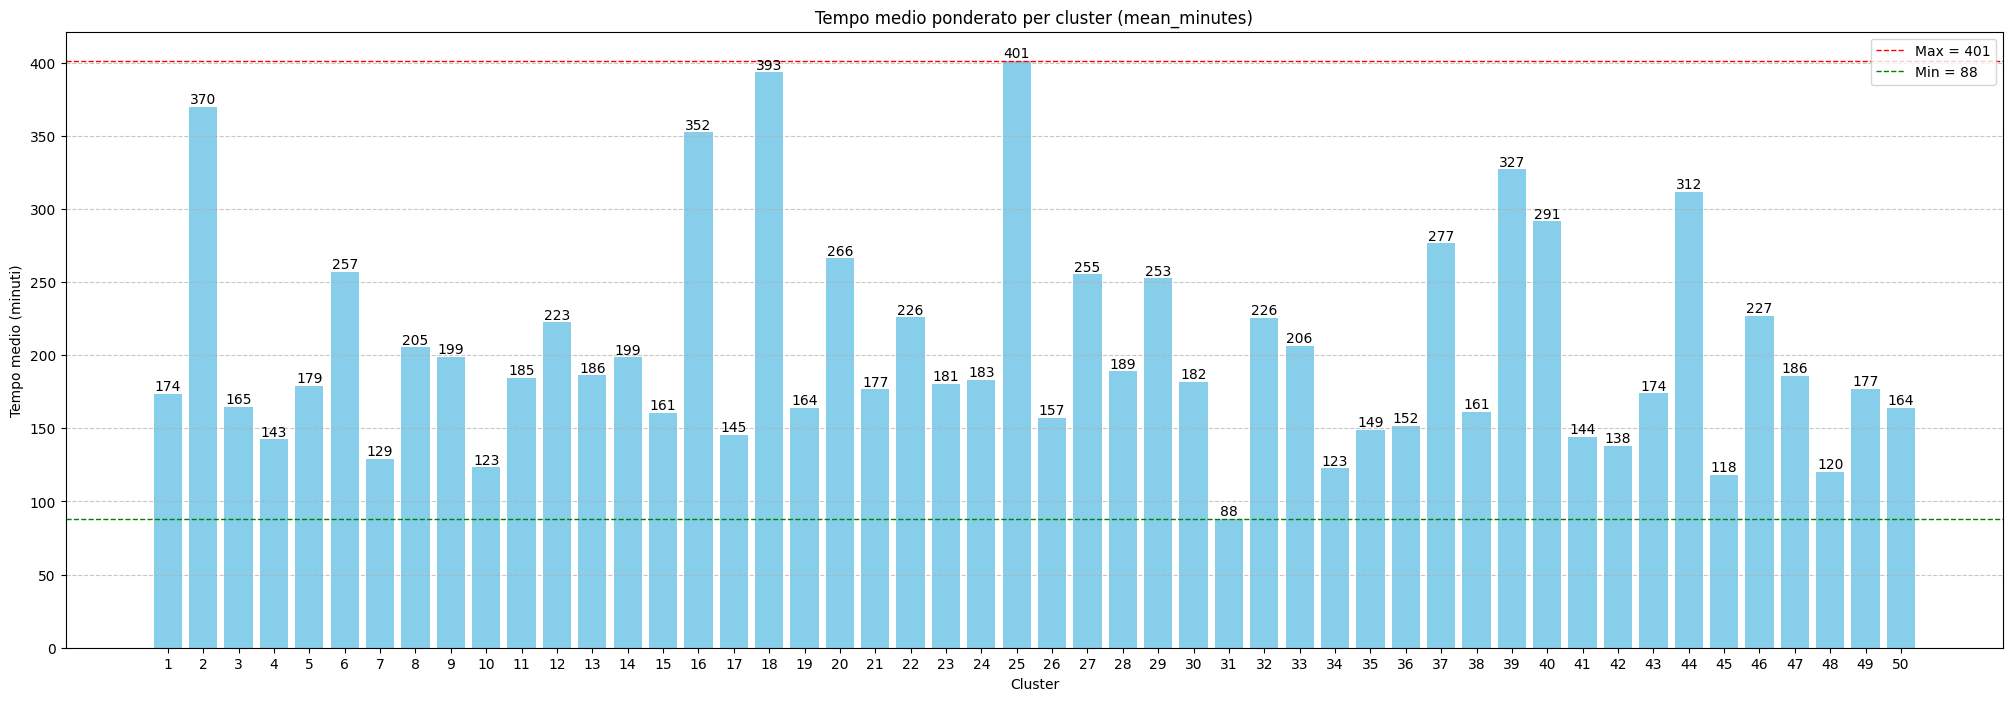

In [106]:
# =========================
# Bar plot: mean_minutes ponderata per n_days per cluster
# =========================

# Calcolo media ponderata: (mean_minutes * n_days) / n_days totali per cluster
mean_minutes_weighted = (
    df_filtered.groupby("cluster_num")
    .apply(lambda x: (x["mean_minutes"] * x["n_days"]).sum() / x["n_days"].sum())
    .reset_index(name="weighted_mean_minutes")
)

plt.figure(figsize=(25,8))

x = mean_minutes_weighted["cluster_num"]
y = mean_minutes_weighted["weighted_mean_minutes"]

bars = plt.bar(x, y, color='skyblue')

# Etichette sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{round(height)}',
             ha='center', va='bottom', fontsize=10)

# Riga orizzontale: massimo
max_val = y.max()
plt.axhline(max_val, color='r', linestyle='dashed', linewidth=1, label=f'Max = {round(max_val)}')
min_val = y.min()
plt.axhline(min_val, color='g', linestyle='dashed', linewidth=1, label=f'Min = {round(min_val)}')
plt.legend(loc='upper right')

plt.xlabel("Cluster")
plt.ylabel("Tempo medio (minuti)")
plt.title("Tempo medio ponderato per cluster (mean_minutes)")
plt.xticks(x, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [107]:
# Filtraggio cluster con media minuti > 400 e < 400
high_minutes = mean_minutes_weighted[mean_minutes_weighted['weighted_mean_minutes'] > 400]
low_minutes = mean_minutes_weighted[mean_minutes_weighted['weighted_mean_minutes'] <= 400]

print("Clusters con media minuti > 400:")
print("-" * 40)
for _, row in high_minutes.iterrows():
    print(f"Cluster {row['cluster_num']}: {row['weighted_mean_minutes']:.1f} minuti")

print("\nClusters con media minuti <= 400:")    
print("-" * 40)
for _, row in low_minutes.iterrows():
    print(f"Cluster {row['cluster_num']}: {row['weighted_mean_minutes']:.1f} minuti")

print("\nRiepilogo:")
print(f"Totale cluster con media > 400 min: {len(high_minutes)}")
print(f"Totale cluster con media <= 400 min: {len(low_minutes)}")

Clusters con media minuti > 400:
----------------------------------------
Cluster 25.0: 401.2 minuti

Clusters con media minuti <= 400:
----------------------------------------
Cluster 1.0: 173.6 minuti
Cluster 2.0: 369.7 minuti
Cluster 3.0: 164.8 minuti
Cluster 4.0: 142.5 minuti
Cluster 5.0: 179.1 minuti
Cluster 6.0: 256.8 minuti
Cluster 7.0: 129.2 minuti
Cluster 8.0: 205.4 minuti
Cluster 9.0: 198.9 minuti
Cluster 10.0: 123.3 minuti
Cluster 11.0: 184.7 minuti
Cluster 12.0: 222.5 minuti
Cluster 13.0: 186.2 minuti
Cluster 14.0: 198.6 minuti
Cluster 15.0: 160.5 minuti
Cluster 16.0: 352.3 minuti
Cluster 17.0: 145.3 minuti
Cluster 18.0: 393.5 minuti
Cluster 19.0: 163.9 minuti
Cluster 20.0: 266.3 minuti
Cluster 21.0: 176.6 minuti
Cluster 22.0: 225.9 minuti
Cluster 23.0: 180.5 minuti
Cluster 24.0: 183.0 minuti
Cluster 26.0: 157.1 minuti
Cluster 27.0: 255.3 minuti
Cluster 28.0: 188.9 minuti
Cluster 29.0: 252.6 minuti
Cluster 30.0: 181.8 minuti
Cluster 31.0: 88.2 minuti
Cluster 32.0: 225.8 min

### tempo di viaggio medio in minuti

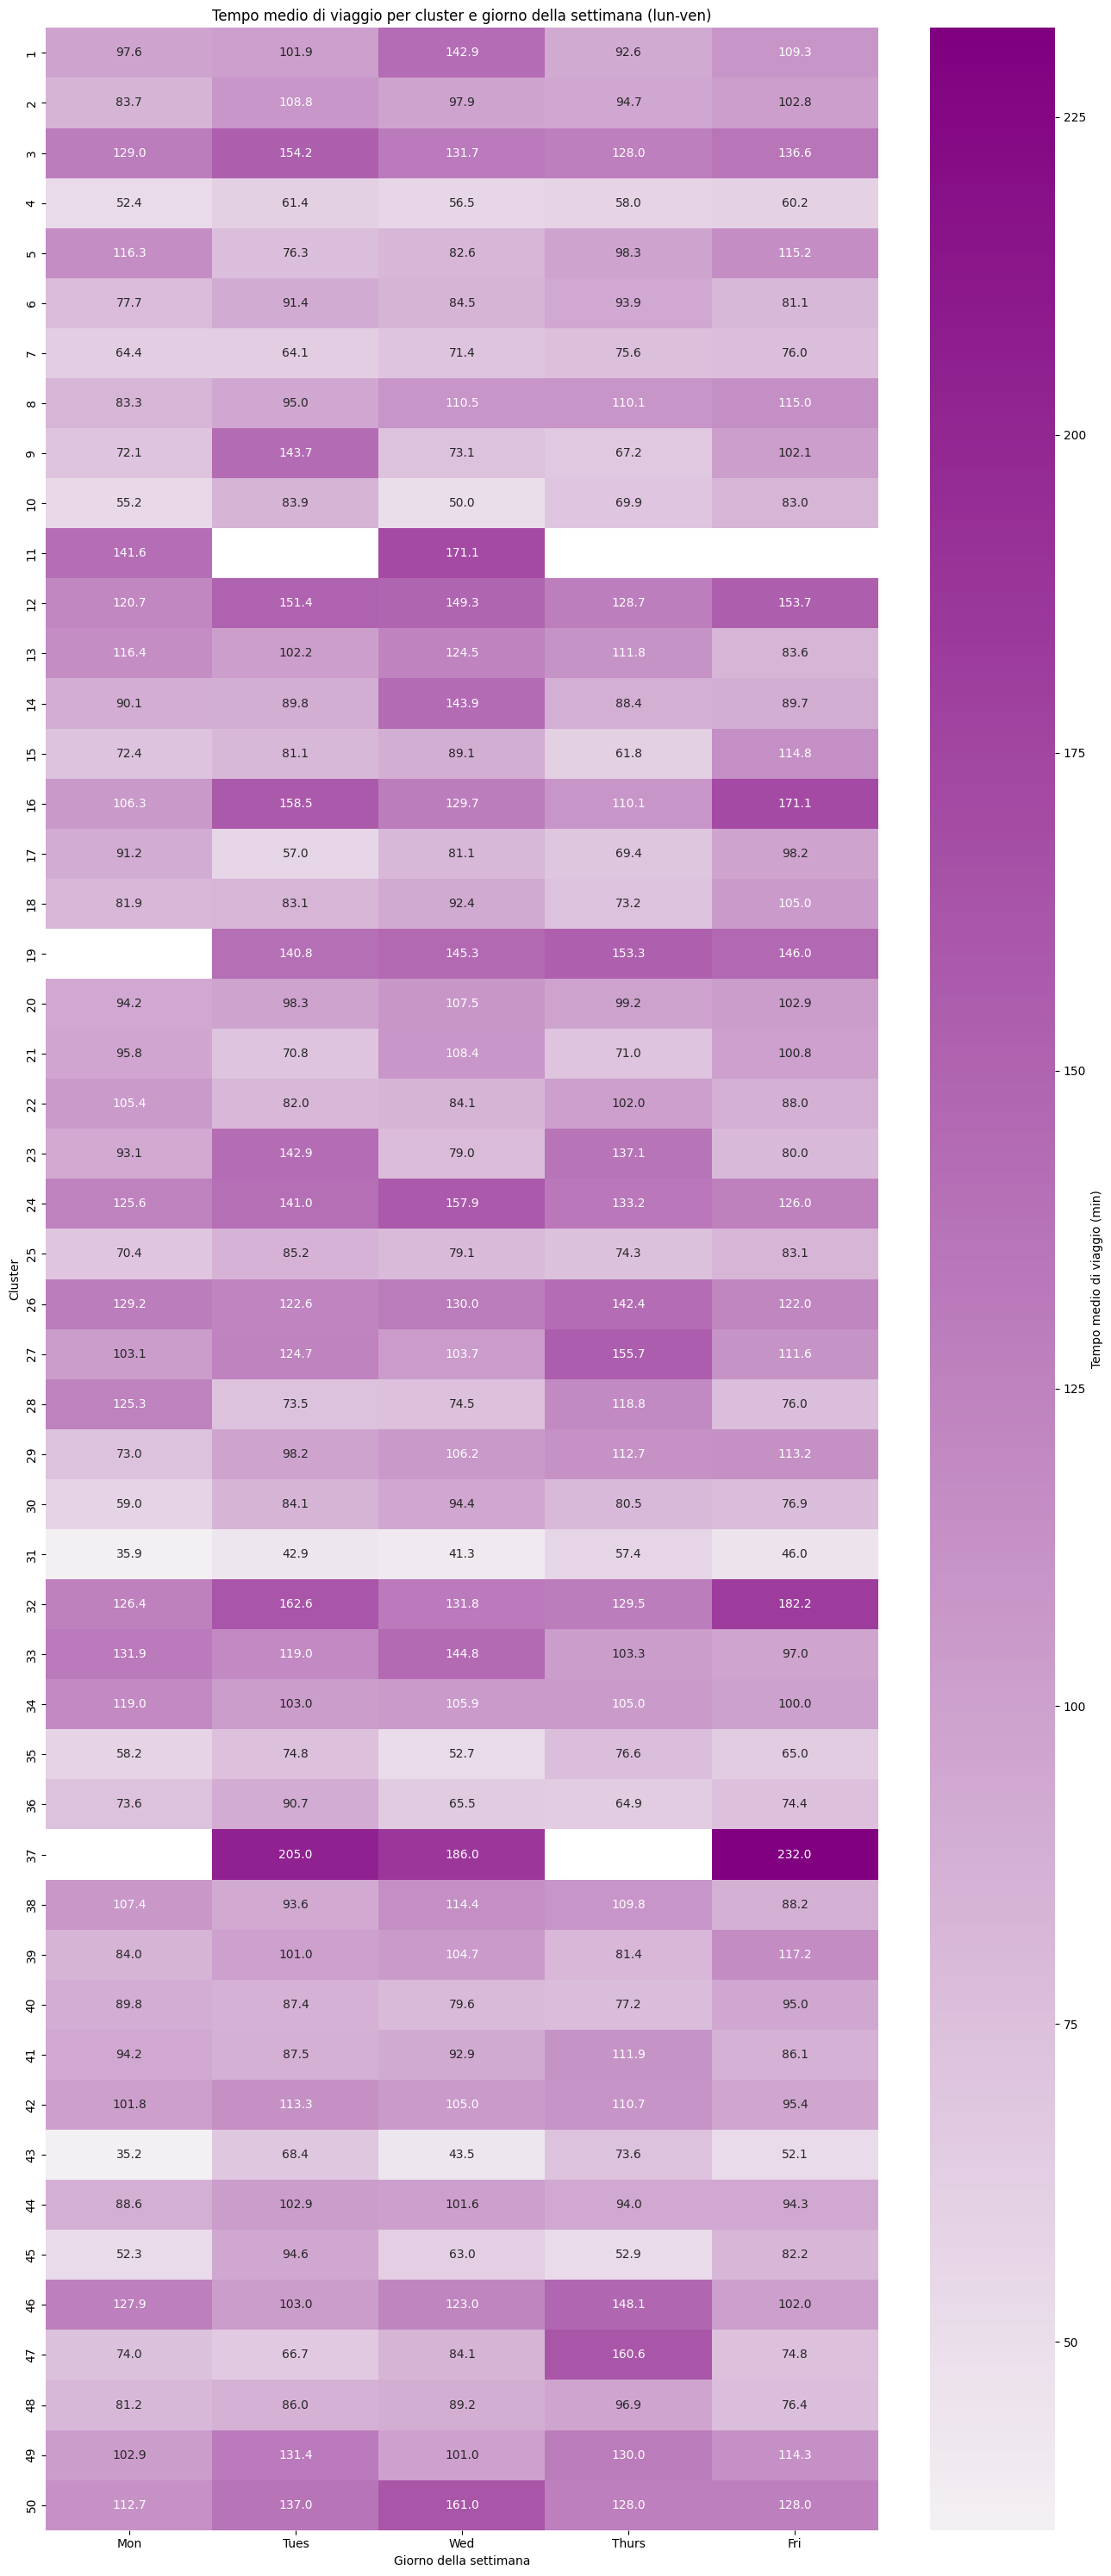

In [108]:
# =========================
# HEATMAP: mean_travel_time_min per cluster e giorno della settimana
# =========================

# Filtriamo solo giorni lavorativi
df_filtered = df[~df["weekday_name"].isin(["Sabato", "Domenica"])].copy()

# Estraiamo il numero del cluster
df_filtered["cluster_num"] = df_filtered["cluster"].str.extract(r'(\d+)').astype(int)


# Pivot table senza ricalcolare le medie
heatmap_data = df_filtered.pivot_table(
    index="cluster_num",
    columns="weekday_name",
    values="mean_travel_time_min"
)[giorni_ordine]

# Plot della heatmap
plt.figure(figsize=(13,30))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap=sns.light_palette("purple", as_cmap=True),
    cbar_kws={'label': 'Tempo medio di viaggio (min)'}
)
plt.title("Tempo medio di viaggio per cluster e giorno della settimana (lun-ven)")
plt.xlabel("Giorno della settimana")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


C:\Users\nicco\AppData\Local\Temp\ipykernel_24288\459762439.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["mean_travel_time_min"] * x["n_days"]).sum() / x["n_days"].sum())


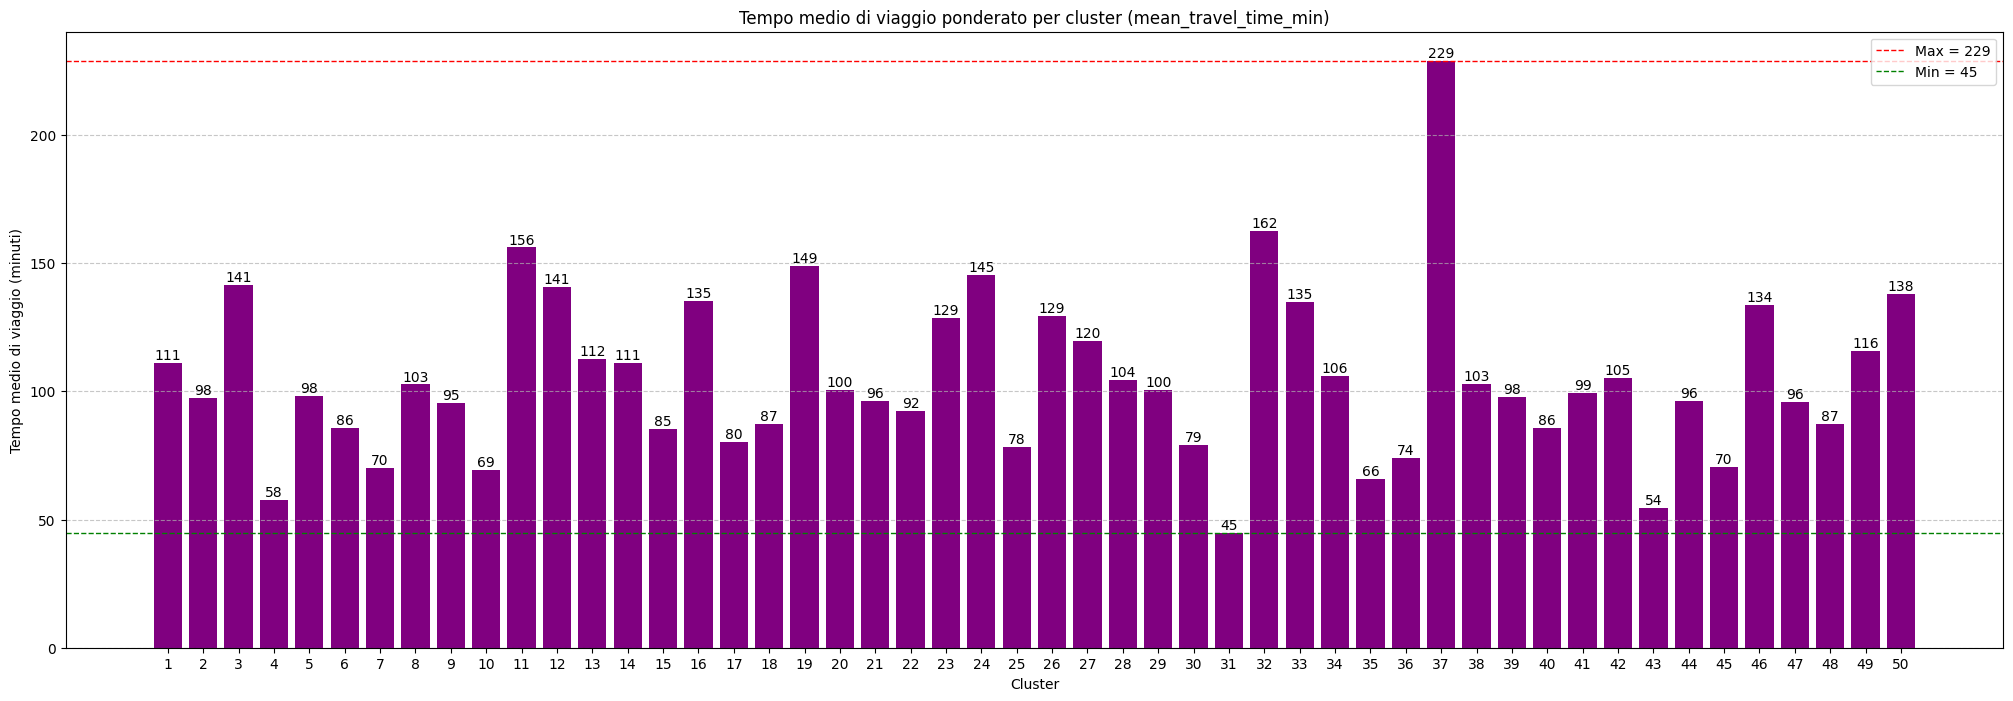

In [109]:
# =========================
# Bar plot: mean_travel_time_min ponderata per n_days per cluster
# =========================

# Calcolo media ponderata: (mean_travel_time_min * n_days) / n_days totali per cluster
mean_travel_time_weighted = (
    df_filtered.groupby("cluster_num")
    .apply(lambda x: (x["mean_travel_time_min"] * x["n_days"]).sum() / x["n_days"].sum())
    .reset_index(name="weighted_mean_travel_time")
)

plt.figure(figsize=(25,8))

x = mean_travel_time_weighted["cluster_num"]
y = mean_travel_time_weighted["weighted_mean_travel_time"]

bars = plt.bar(x, y, color='purple')

# Etichette sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{round(height)}',
             ha='center', va='bottom', fontsize=10)

# Riga orizzontale: massimo
max_val = y.max()
plt.axhline(max_val, color='r', linestyle='dashed', linewidth=1, label=f'Max = {round(max_val)}')
min_val = y.min()
plt.axhline(min_val, color='g', linestyle='dashed', linewidth=1, label=f'Min = {round(min_val)}')
plt.legend(loc='upper right')

plt.xlabel("Cluster")
plt.ylabel("Tempo medio di viaggio (minuti)")
plt.title("Tempo medio di viaggio ponderato per cluster (mean_travel_time_min)")
plt.xticks(x, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### tempo di unloading medio in minuti

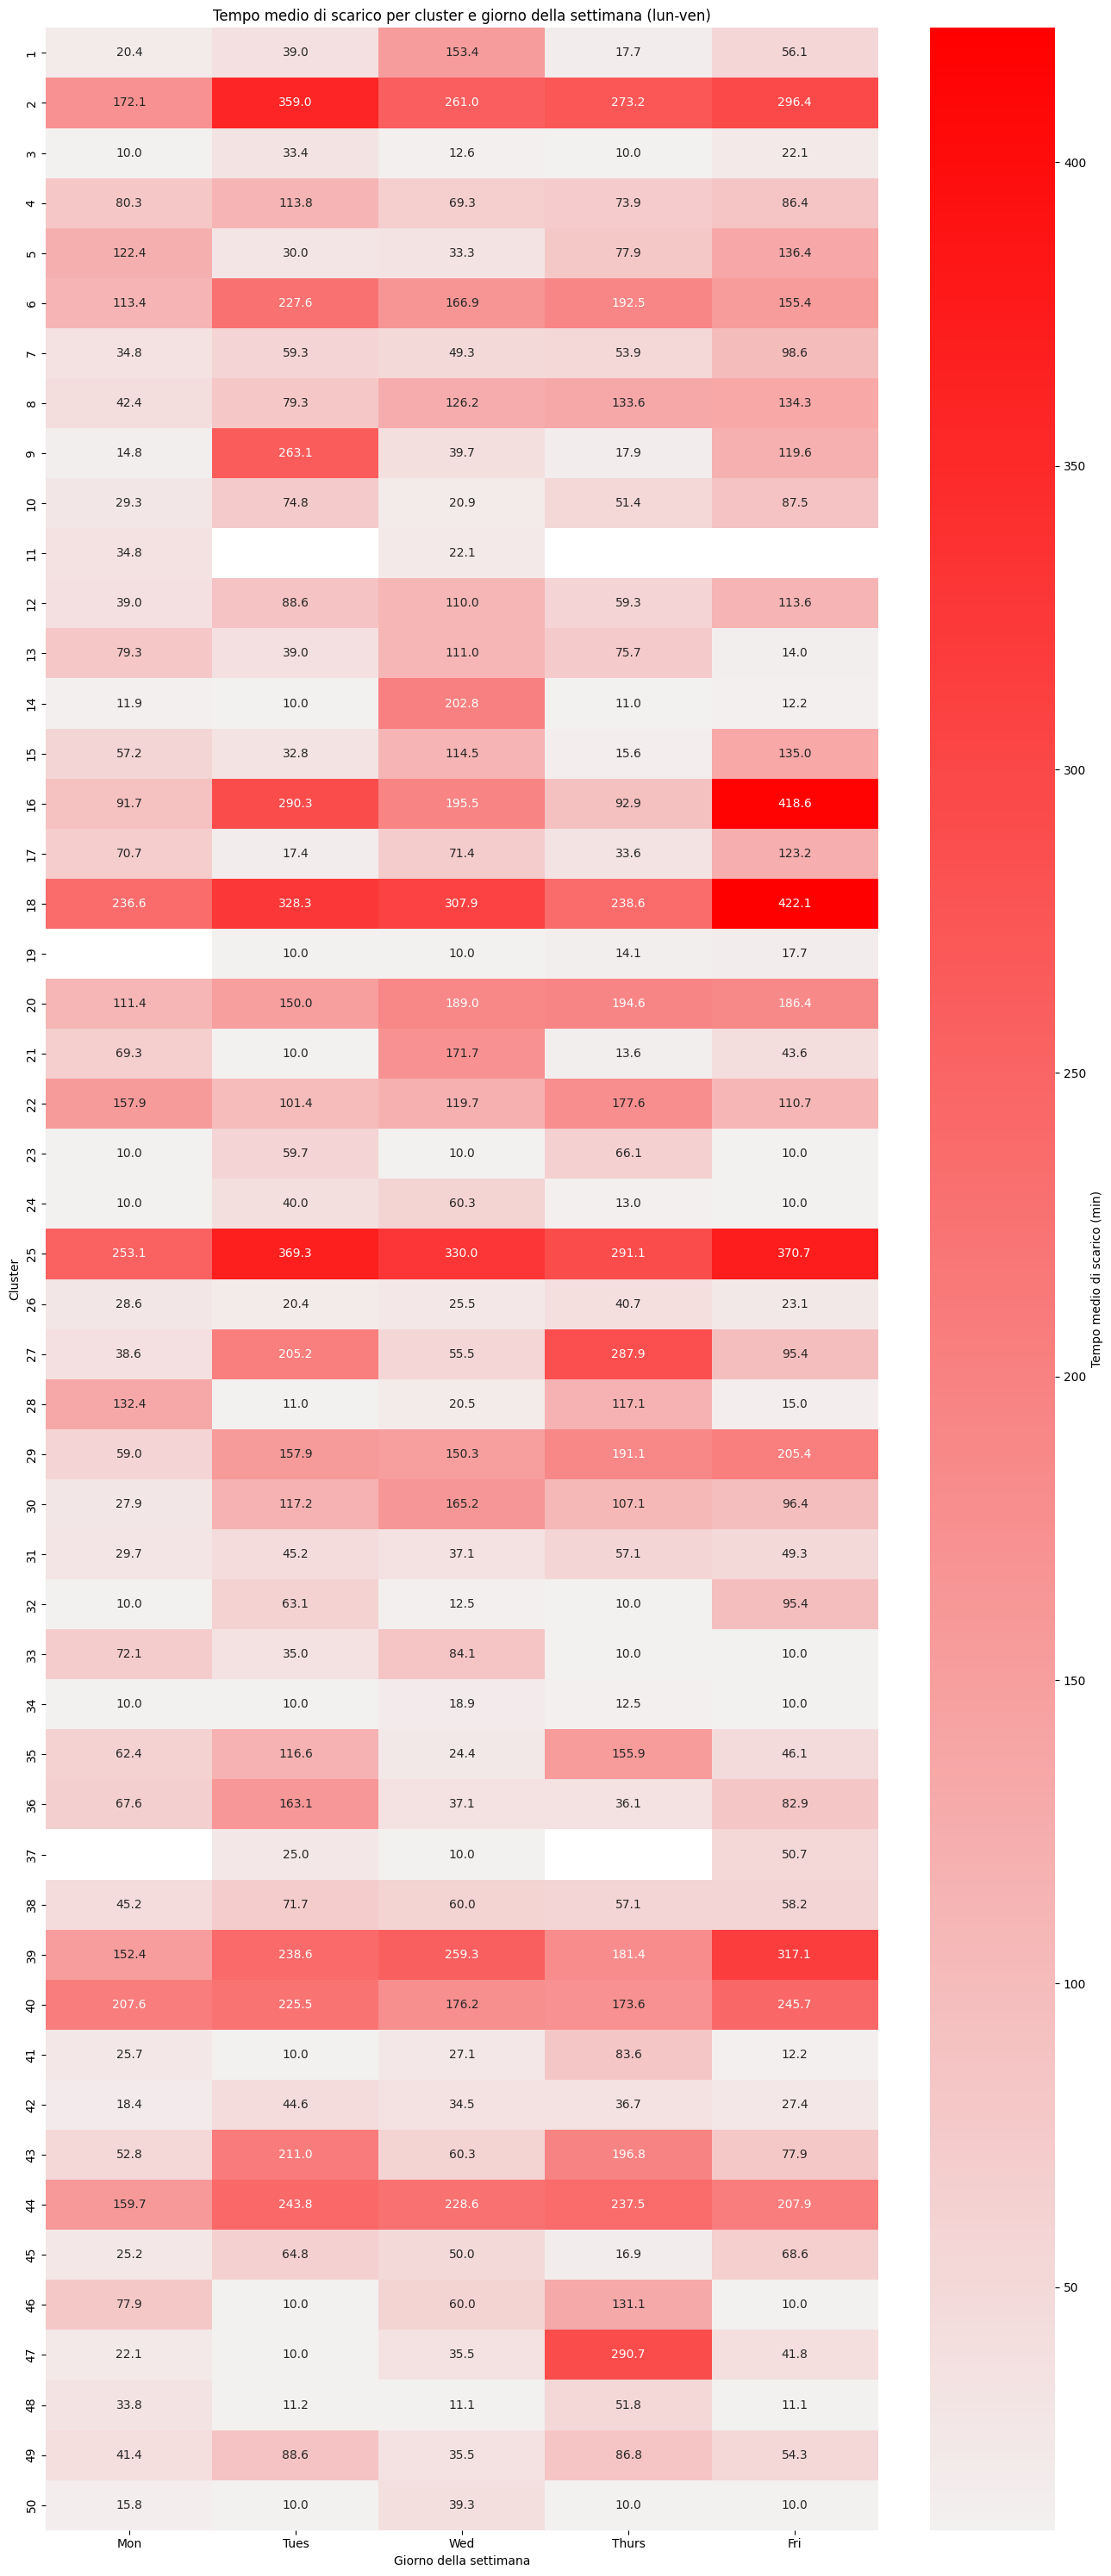

In [110]:
# =========================
# HEATMAP: mean_unloading_time_min per cluster e giorno della settimana
# =========================

# Filtriamo solo giorni lavorativi
df_filtered = df[~df["weekday_name"].isin(["Sabato", "Domenica"])].copy()

# Estraiamo il numero del cluster
df_filtered["cluster_num"] = df_filtered["cluster"].str.extract(r'(\d+)').astype(int)

# Pivot table senza ricalcolare le medie
heatmap_data = df_filtered.pivot_table(
    index="cluster_num",
    columns="weekday_name",
    values="mean_unloading_time_min"
)[giorni_ordine]

# Plot della heatmap
plt.figure(figsize=(13,30))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap=sns.light_palette("red", as_cmap=True),
    cbar_kws={'label': 'Tempo medio di scarico (min)'}
)
plt.title("Tempo medio di scarico per cluster e giorno della settimana (lun-ven)")
plt.xlabel("Giorno della settimana")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


C:\Users\nicco\AppData\Local\Temp\ipykernel_24288\4209695192.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["mean_unloading_time_min"] * x["n_days"]).sum() / x["n_days"].sum())


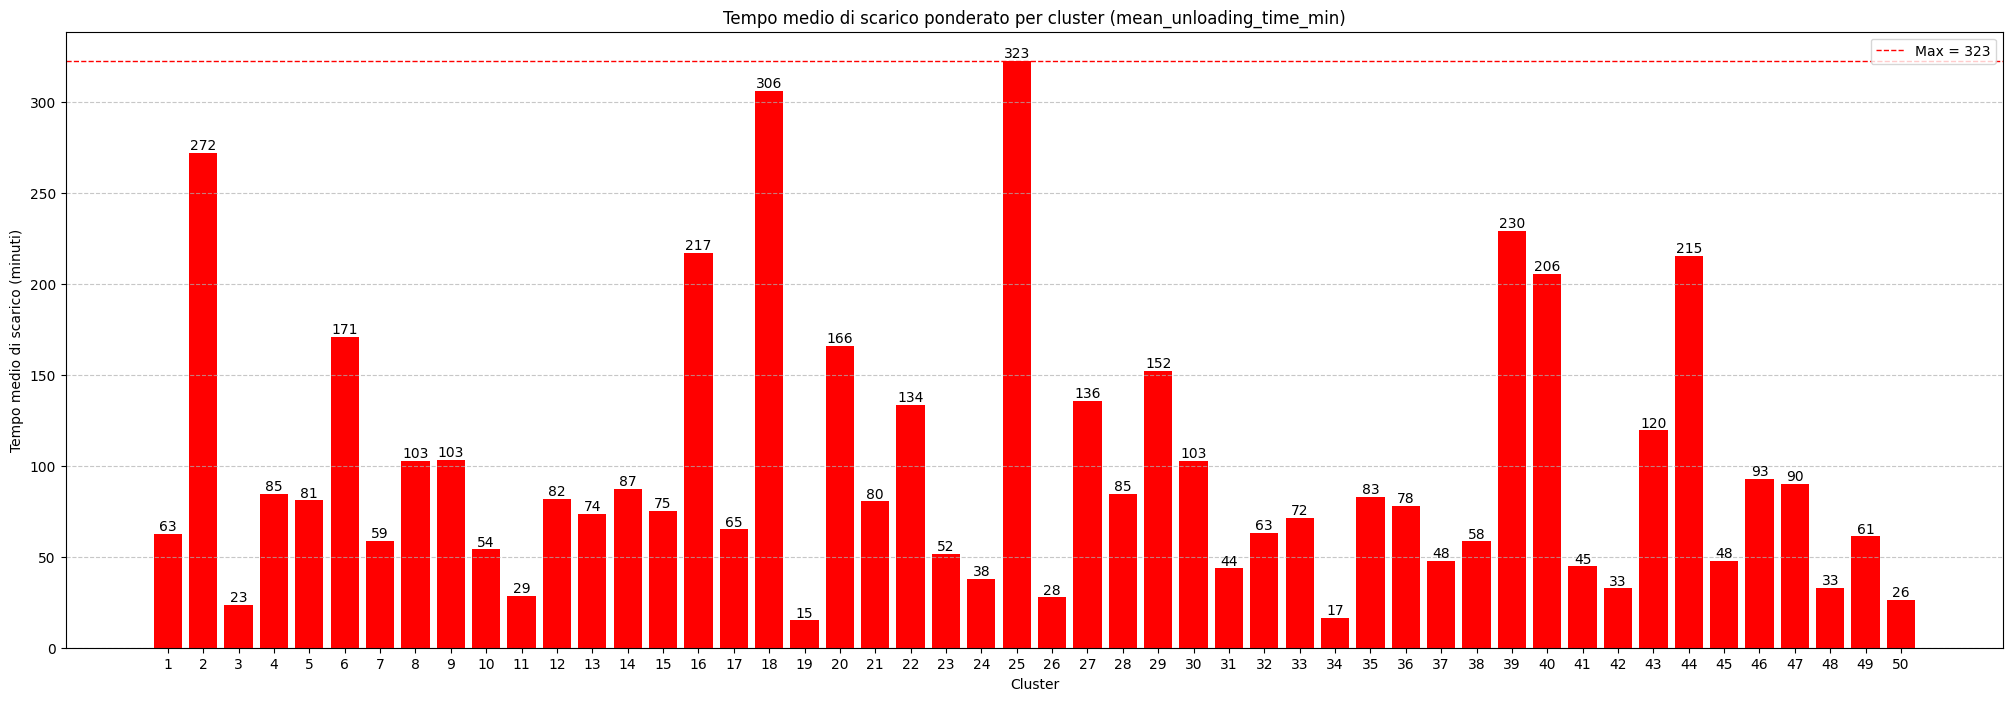

In [111]:
# =========================
# Bar plot: mean_unloading_time_min ponderata per n_days per cluster
# =========================

# Calcolo media ponderata: (mean_unloading_time_min * n_days) / n_days totali per cluster
mean_unloading_time_weighted = (
    df_filtered.groupby("cluster_num")
    .apply(lambda x: (x["mean_unloading_time_min"] * x["n_days"]).sum() / x["n_days"].sum())
    .reset_index(name="weighted_mean_unloading_time")
)

plt.figure(figsize=(25,8))

x = mean_unloading_time_weighted["cluster_num"]
y = mean_unloading_time_weighted["weighted_mean_unloading_time"]

bars = plt.bar(x, y, color='red')

# Etichette sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{round(height)}',
             ha='center', va='bottom', fontsize=10)

# Riga orizzontale: massimo
max_val = y.max()
plt.axhline(max_val, color='r', linestyle='dashed', linewidth=1, label=f'Max = {round(max_val)}')

plt.xlabel("Cluster")
plt.ylabel("Tempo medio di scarico (minuti)")
plt.title("Tempo medio di scarico ponderato per cluster (mean_unloading_time_min)")
plt.xticks(x, rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Pacchetti max consegnati 

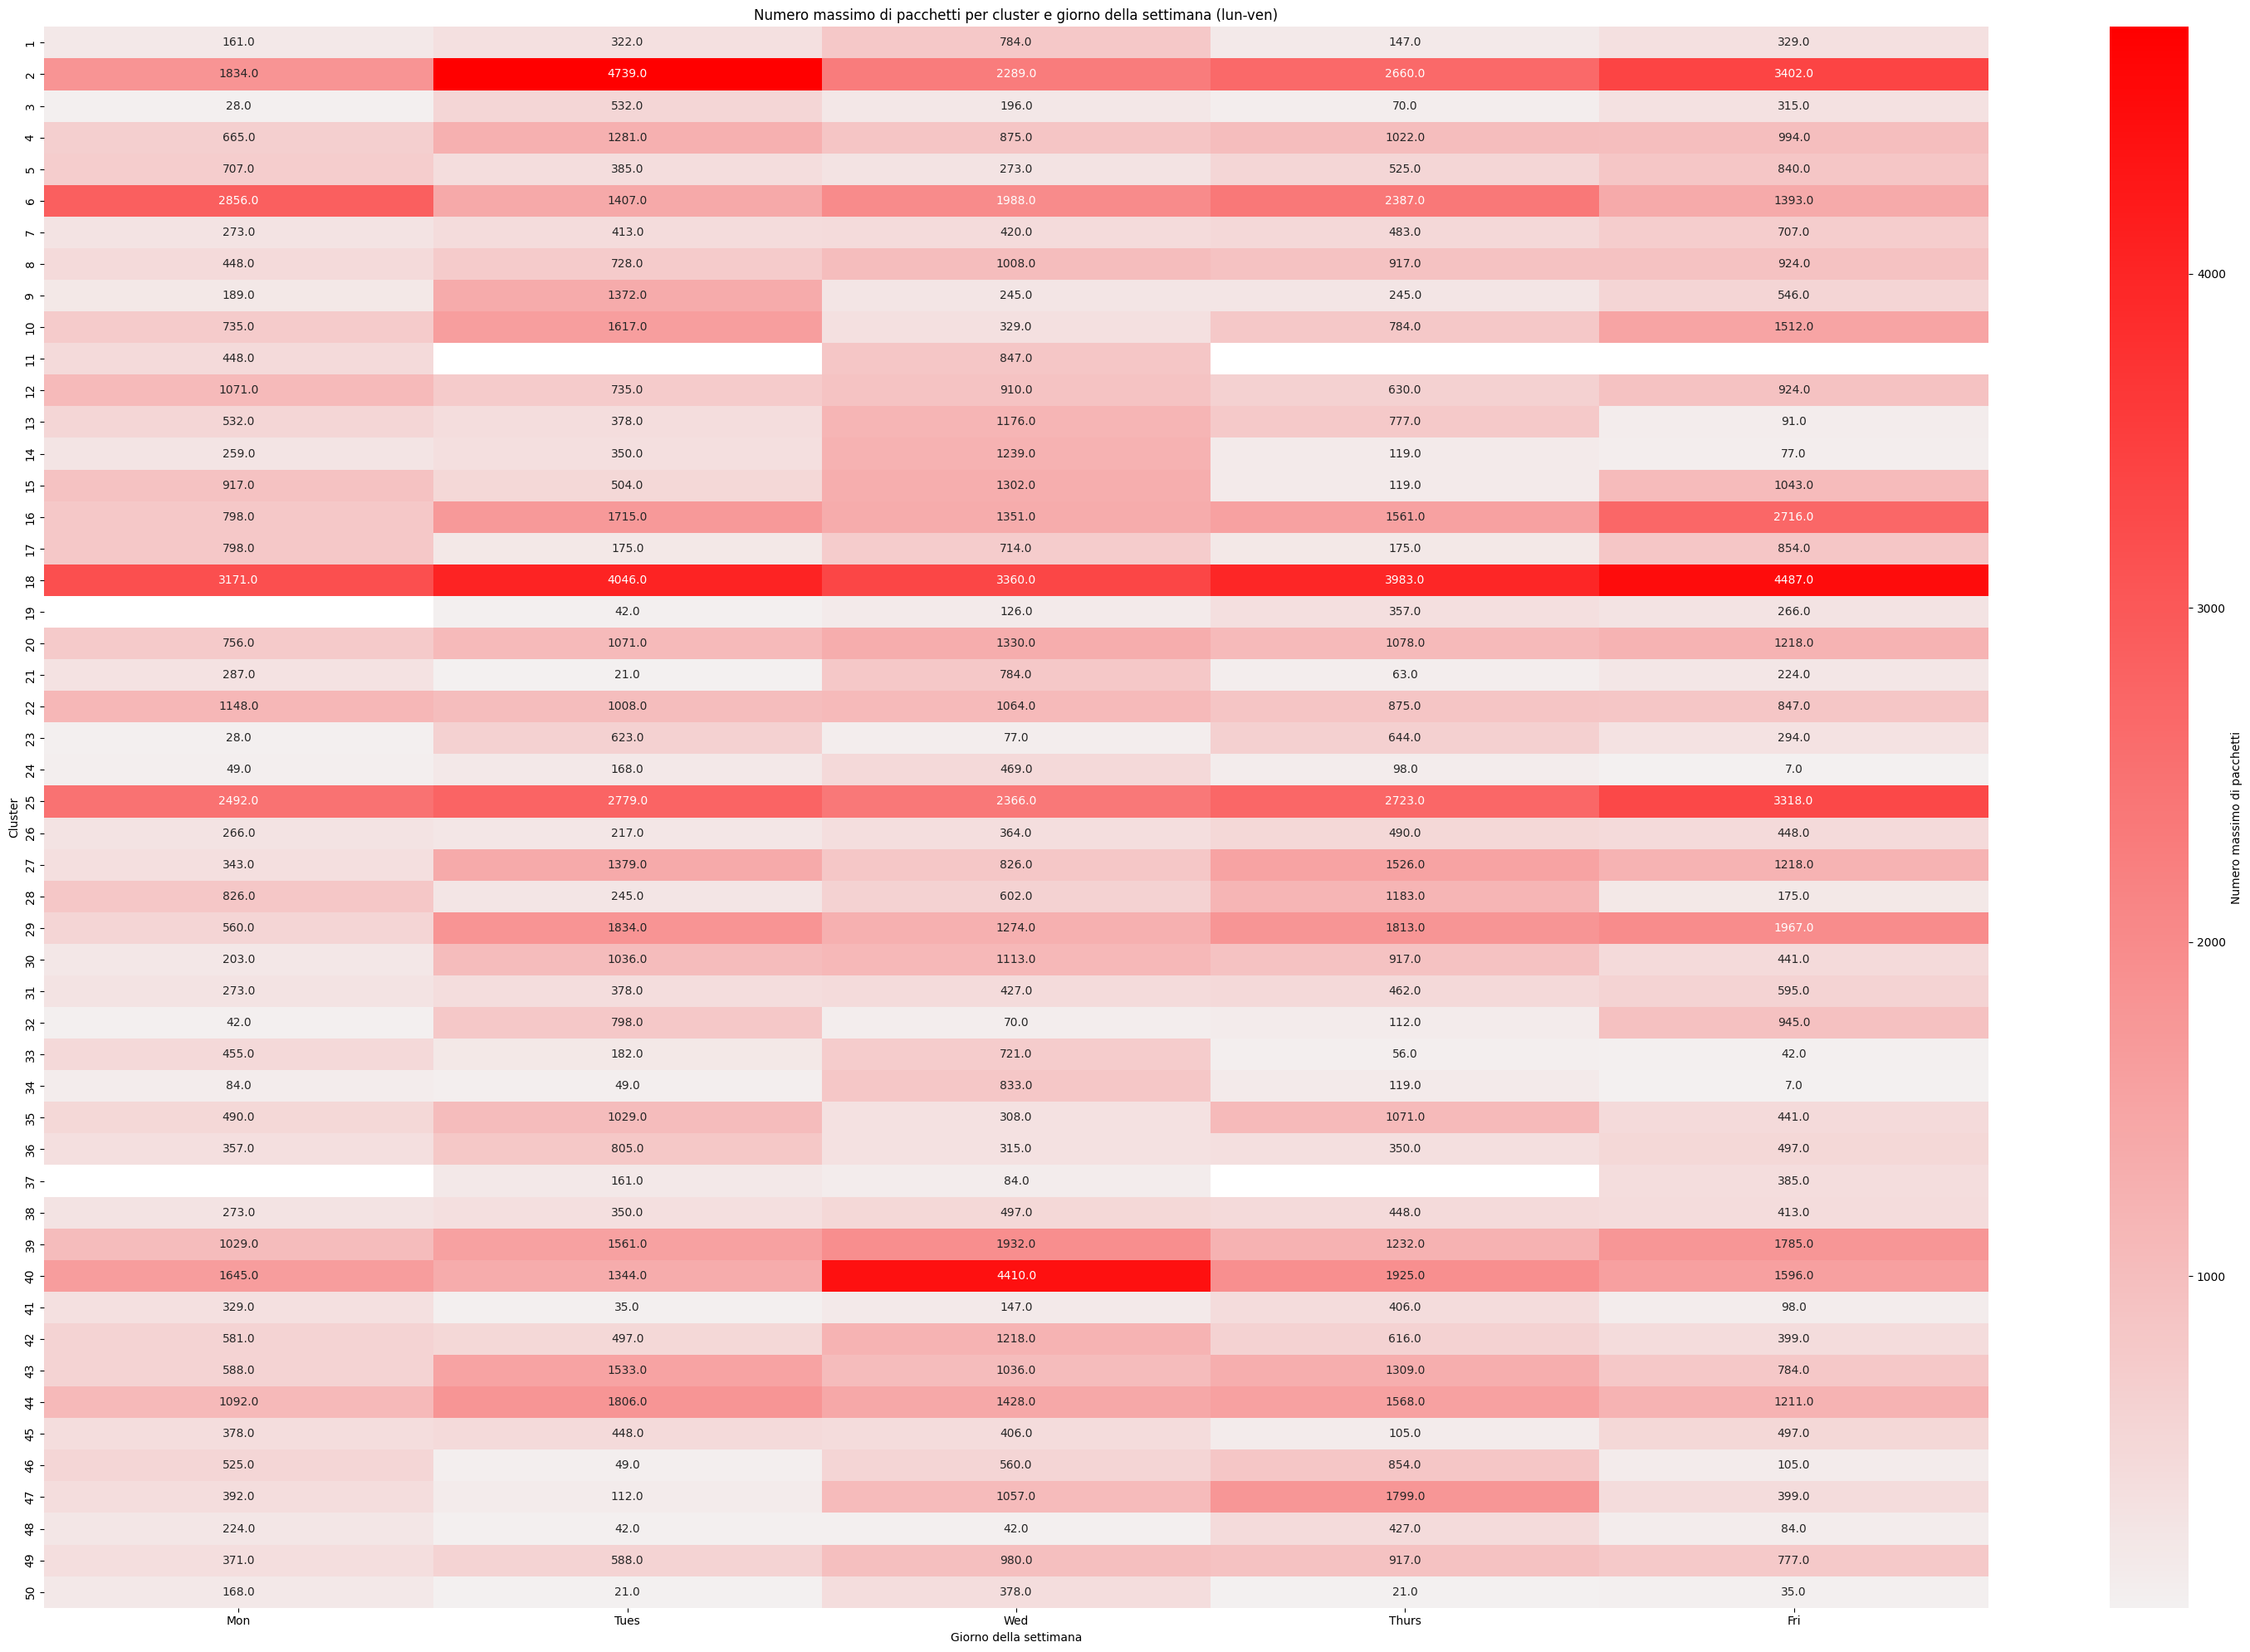

In [112]:
# =========================
# HEATMAP: max_num_packages per cluster e giorno della settimana
# =========================

# Filtriamo solo giorni lavorativi
df_filtered = df[~df["weekday_name"].isin(["Sabato", "Domenica"])].copy()

# Estraiamo il numero del cluster
df_filtered["cluster_num"] = df_filtered["cluster"].str.extract(r'(\d+)').astype(int)

# Pivot table senza ricalcolare le medie
heatmap_data = df_filtered.pivot_table(
    index="cluster_num",
    columns="weekday_name",
    values="max_num_packages"
)[giorni_ordine]

# Plot della heatmap
plt.figure(figsize=(30,20))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap=sns.light_palette("red", as_cmap=True),
    cbar_kws={'label': 'Numero massimo di pacchetti'}
)
plt.title("Numero massimo di pacchetti per cluster e giorno della settimana (lun-ven)")
plt.xlabel("Giorno della settimana")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


C:\Users\nicco\AppData\Local\Temp\ipykernel_24288\3952242269.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["max_num_packages"] * x["n_days"]).sum() / x["n_days"].sum())


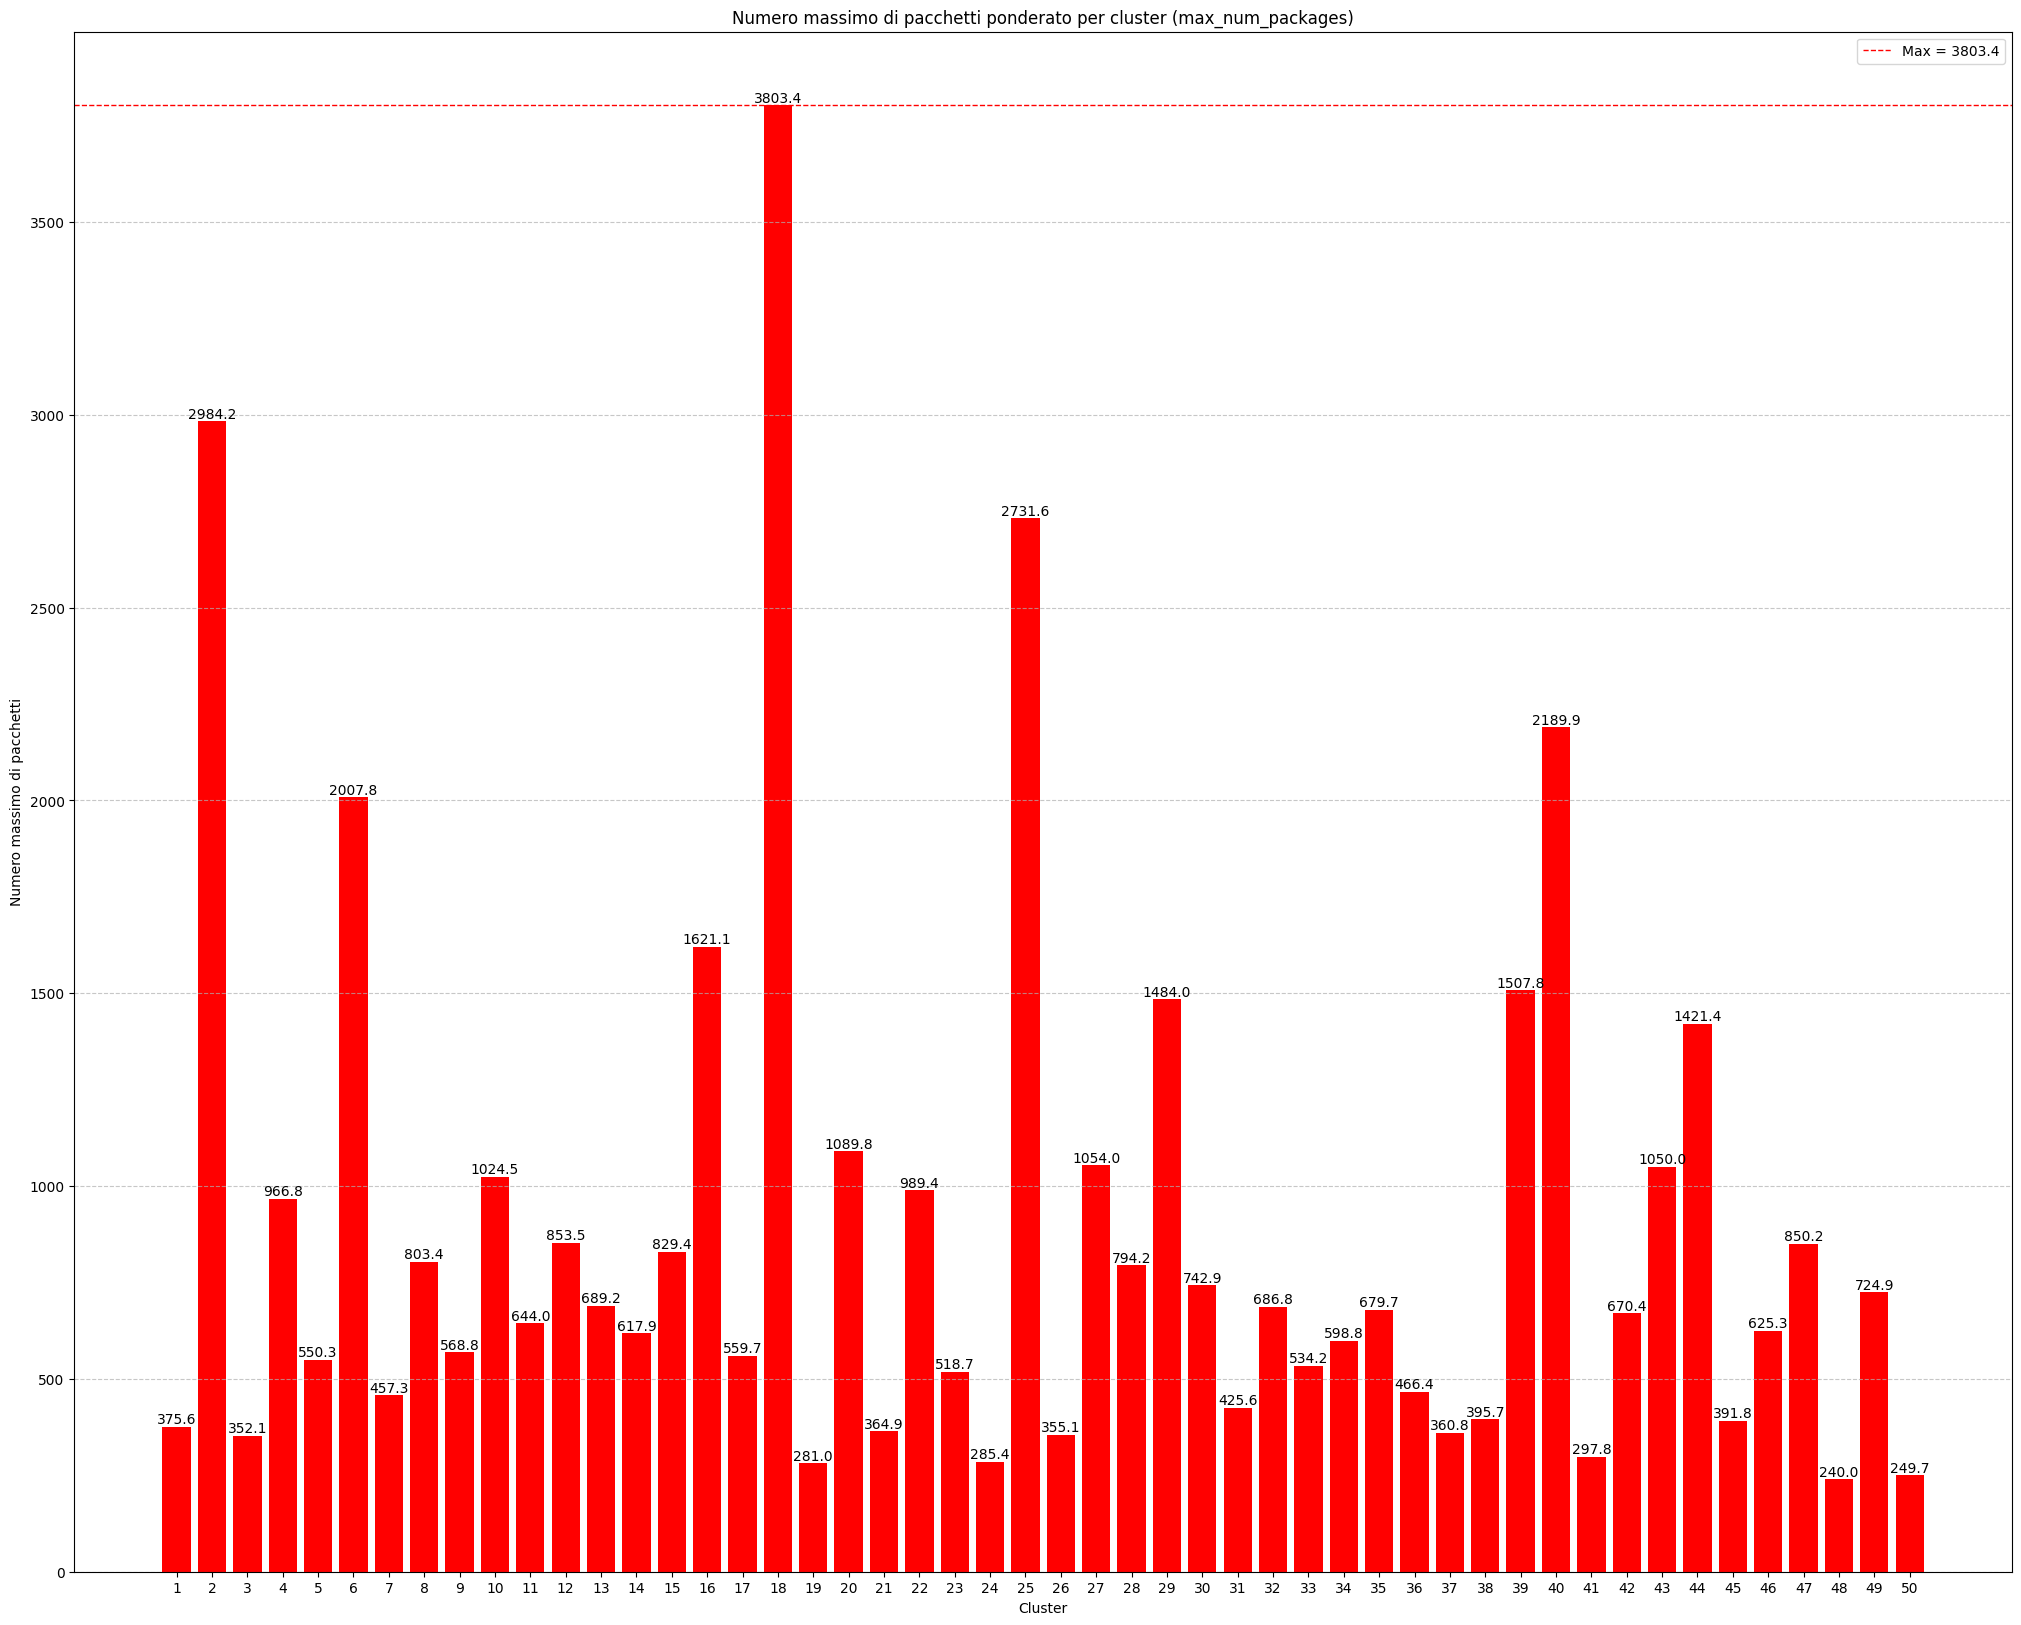

In [113]:
# =========================
# Bar plot: Max_num_packages ponderata per n_days per cluster
# =========================

# Calcolo media ponderata: (max_num_packages * n_days) / n_days totali per cluster
max_num_packages_weighted = (
    df_filtered.groupby("cluster_num")
    .apply(lambda x: (x["max_num_packages"] * x["n_days"]).sum() / x["n_days"].sum())
    .reset_index(name="weighted_max_num_packages")
)

plt.figure(figsize=(25,20))

x = max_num_packages_weighted["cluster_num"]
y = max_num_packages_weighted["weighted_max_num_packages"]

bars = plt.bar(x, y, color='red')

# Etichette sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.1f}',
             ha='center', va='bottom', fontsize=10)

# Riga orizzontale: massimo
max_val = y.max()
plt.axhline(max_val, color='r', linestyle='dashed', linewidth=1, label=f'Max = {max_val:.1f}')

plt.xlabel("Cluster")
plt.ylabel("Numero massimo di pacchetti")
plt.title("Numero massimo di pacchetti ponderato per cluster (max_num_packages)")
plt.xticks(x, rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Aggiunta di variabili al dataset

In [114]:
# =====================================================
# Aggiunta di nuove variabili per analisi approfondita
# =====================================================
# Questo script calcola le nuove metriche a livello giornaliero per ogni cluster
# Senza aggregare: ogni riga rimane associata al proprio cluster e giorno

# =========================
# 1. Efficienza delle consegne
# =========================

# Consegne per ora totale (produttività generale)
df["deliveries_per_hour"] = df["mean_num_deliveries"] / (df["mean_minutes"]/60)

# Consegne per ora di solo viaggio (efficienza del tempo di viaggio)
df["deliveries_per_travel_hour"] = df["mean_num_deliveries"] / (df["mean_travel_time_min"]/60)

# Distanza media percorsa per consegna
df["km_per_delivery"] = df["mean_distance_m"] / df["mean_num_deliveries"]

# =========================
# 2. Variabilità di distanza e tempo
# =========================
# NOTA: qui assumiamo che nel dataset siano presenti colonne con min e max per distanza e minuti

# Variabilità della distanza percorsa (quanto varia rispetto alla media)
df["distance_variability"] = (df["max_distance_m"] - df["min_distance_m"]) / df["mean_distance_m"]

# Variabilità del tempo totale (quanto varia rispetto alla media)
df["minutes_variability"] = (df["max_minutes"] - df["min_minutes"]) / df["mean_minutes"]

# =========================
# 3. Bilanciamento tra viaggio e scarico
# =========================

# Rapporto tra tempo di viaggio e tempo di scarico
# Se > 1 → più tempo speso viaggiando, se < 1 → più tempo nello scarico
df["travel_vs_unloading_ratio"] = df["mean_travel_time_min"] / df["mean_unloading_time_min"]

# Percentuale del tempo totale dedicata allo scarico
df["unloading_percentage"] = df["mean_unloading_time_min"] / df["mean_minutes"]

# =========================
# Controllo finale
# =========================
print("Prime righe del dataset aggiornato con nuove variabili:")
print(df[[
    "cluster", "weekday_name", "deliveries_per_hour", "deliveries_per_travel_hour", 
    "km_per_delivery", "distance_variability", "minutes_variability",
    "travel_vs_unloading_ratio", "unloading_percentage"
]].head())


Prime righe del dataset aggiornato con nuove variabili:
     cluster weekday_name  deliveries_per_hour  deliveries_per_travel_hour  \
0  Cluster 1          Mon             1.035422                    1.251372   
1  Cluster 1         Tues             1.659325                    2.293640   
2  Cluster 1          Wed             3.107180                    6.444605   
3  Cluster 1        Thurs             0.962343                    1.146179   
4  Cluster 1          Fri             2.034118                    3.077426   

   km_per_delivery  distance_variability  minutes_variability  \
0     53377.245614              0.205750             0.525583   
1     27413.849558              0.177833             0.787812   
2      8170.191011              0.095294             0.651344   
3     59145.869565              0.133903             0.652720   
4     19726.681529              0.204032             0.513928   

   travel_vs_unloading_ratio  unloading_percentage  
0                   4.794737   

## Consegne per ora

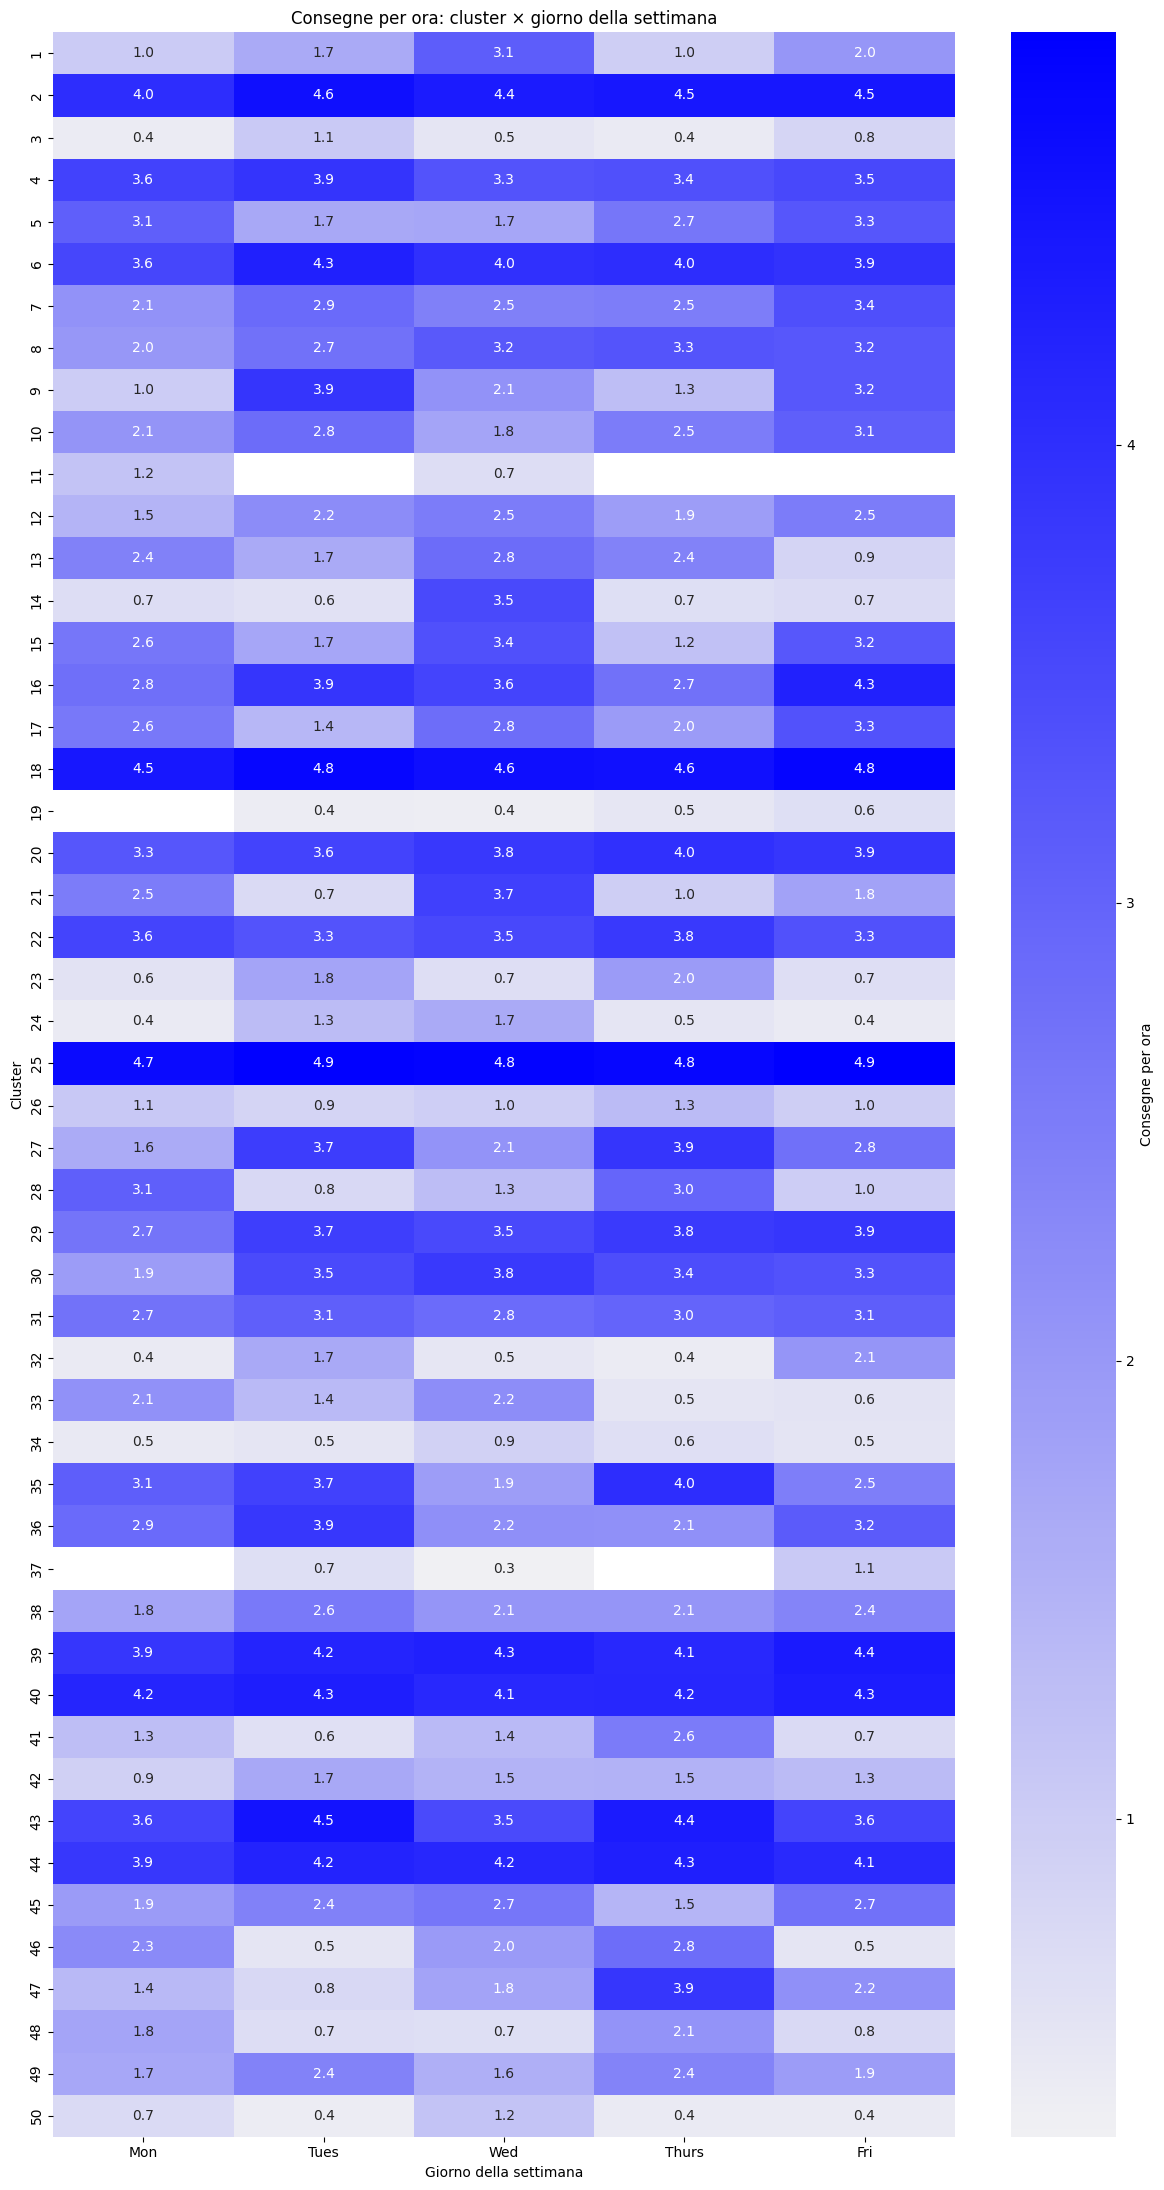

In [115]:
# =========================
# HEATMAP: deliveries_per_hour per cluster e giorno della settimana
# =========================

# 1. Filtriamo solo i giorni lavorativi (Lunedì-Venerdì)
df_filtered = df[~df["weekday_name"].isin(["Sabato", "Domenica"])].copy()

# 2. Estraiamo il numero del cluster dalla colonna 'cluster'
#    Es: "Cluster 10" -> 10
df_filtered["cluster_num"] = df_filtered["cluster"].str.extract(r'(\d+)').astype(int)


# 4. Creiamo la pivot table:
#    - righe = cluster numerico
#    - colonne = giorno della settimana
#    - valori = deliveries_per_hour già calcolato
#    Non ricalcoliamo la media, usiamo direttamente i valori presenti
heatmap_data = df_filtered.pivot_table(
    index="cluster_num",
    columns="weekday_name",
    values="deliveries_per_hour"
)[giorni_ordine]  # ordiniamo le colonne secondo i giorni

# 5. Plot della heatmap
plt.figure(figsize=(12,22))  # dimensione della figura

sns.heatmap(
    heatmap_data,
    annot=True,                    # mostra i valori nelle celle
    fmt=".1f",                     # formato dei numeri (1 decimale)
    cmap=sns.light_palette("blue", as_cmap=True),  # palette blu chiara
    cbar_kws={'label': 'Consegne per ora'}        # etichetta della colorbar
)

# 6. Titolo e etichette degli assi
plt.title("Consegne per ora: cluster × giorno della settimana")
plt.xlabel("Giorno della settimana")
plt.ylabel("Cluster")

# 7. Layout ottimizzato per non tagliare etichette
plt.tight_layout()

# 8. Mostra il grafico
plt.show()


## Unloading percentage

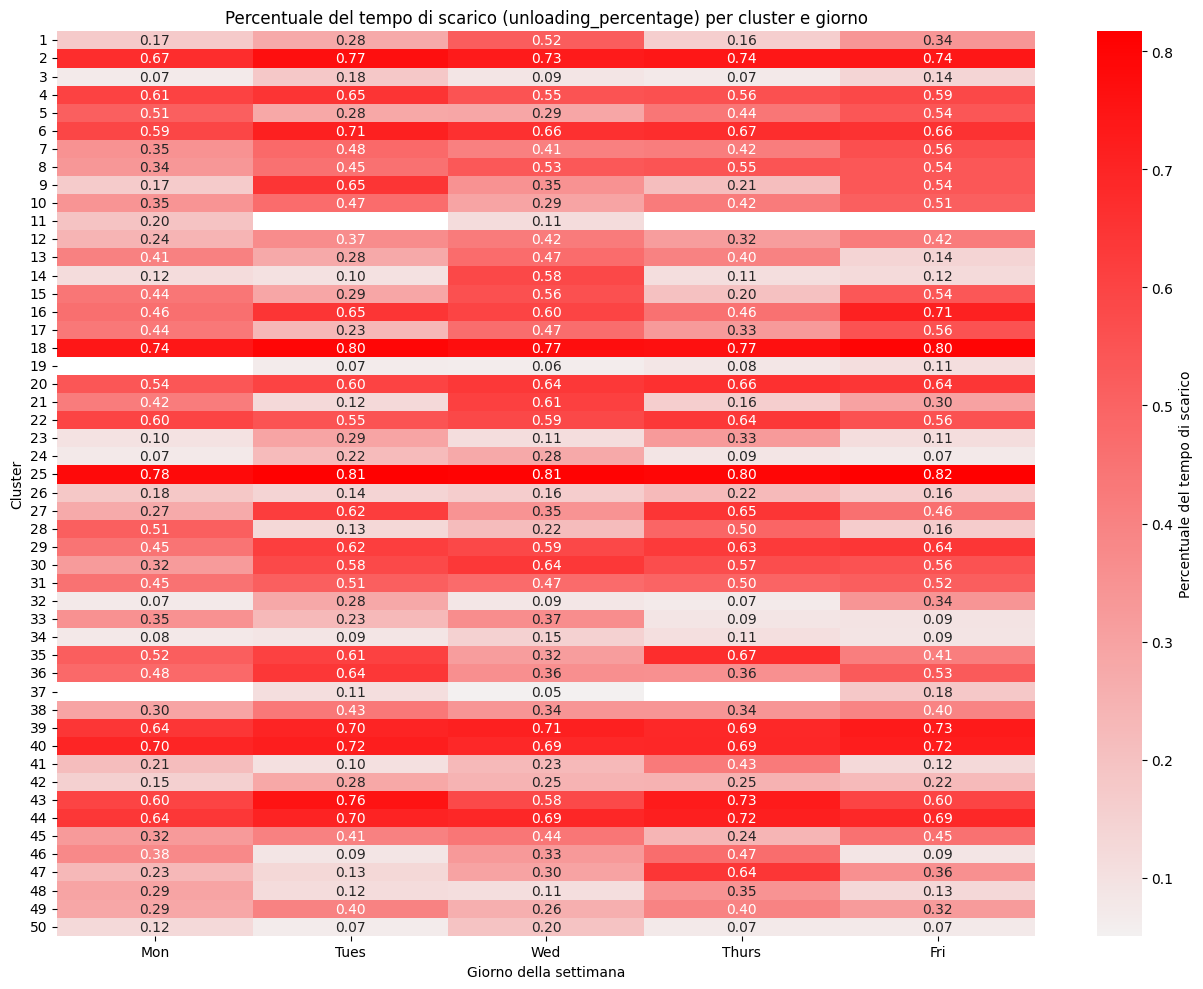

In [116]:
# =========================
# HEATMAP: unloading_percentage per cluster e giorno della settimana
# =========================

# 1. Filtriamo solo i giorni lavorativi (Lunedì-Venerdì)
df_filtered = df[~df["weekday_name"].isin(["Sabato", "Domenica"])].copy()

# 2. Estraiamo il numero del cluster dalla colonna 'cluster'
#    Es: "Cluster 10" -> 10
df_filtered["cluster_num"] = df_filtered["cluster"].str.extract(r'(\d+)').astype(int)

# 4. Creiamo la pivot table:
#    - righe = cluster numerico
#    - colonne = giorno della settimana
#    - valori = unloading_percentage
heatmap_data = df_filtered.pivot_table(
    index="cluster_num",
    columns="weekday_name",
    values="unloading_percentage"
)[giorni_ordine]  # ordiniamo le colonne secondo i giorni

# 5. Plot della heatmap
plt.figure(figsize=(13,10))  # dimensione della figura

sns.heatmap(
    heatmap_data,
    annot=True,                         # mostra i valori nelle celle
    fmt=".2f",                          # formato numerico con 2 decimali
    cmap=sns.light_palette("red", as_cmap=True),  # palette rossa chiara
    cbar_kws={'label': 'Percentuale del tempo di scarico'}  # etichetta della colorbar
)

# 6. Titolo e etichette degli assi
plt.title("Percentuale del tempo di scarico (unloading_percentage) per cluster e giorno")
plt.xlabel("Giorno della settimana")
plt.ylabel("Cluster")

# 7. Layout ottimizzato
plt.tight_layout()

# 8. Mostra il grafico
plt.show()


## Travel-unloading ratio (cluster-weekday)

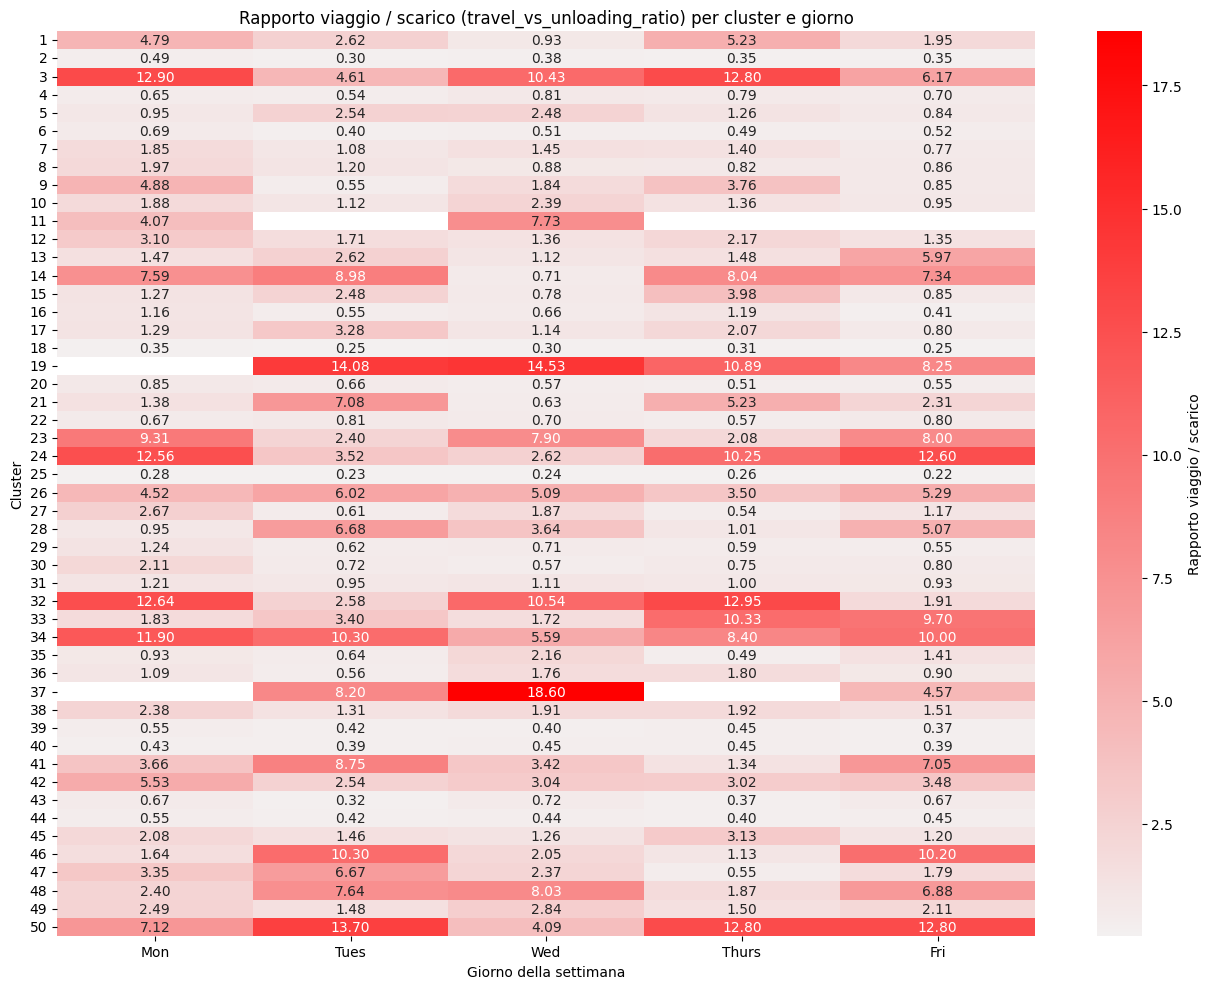

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtra solo i giorni lavorativi (Lunedì-Venerdì)
df_filtered = df[~df["weekday_name"].isin(["Sabato", "Domenica"])].copy()

# 2. Estrai il numero del cluster dalla colonna 'cluster'
df_filtered["cluster_num"] = df_filtered["cluster"].str.extract(r'(\d+)').astype(int)

# 4. Crea la pivot table per travel_vs_unloading_ratio
heatmap_data = df_filtered.pivot_table(
    index="cluster_num",
    columns="weekday_name",
    values="travel_vs_unloading_ratio"
)[giorni_ordine]

# 5. Plot della heatmap
plt.figure(figsize=(13,10))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap=sns.light_palette("red", as_cmap=True),
    cbar_kws={'label': 'Rapporto viaggio / scarico'}
)

# 6. Titolo e assi
plt.title("Rapporto viaggio / scarico (travel_vs_unloading_ratio) per cluster e giorno")
plt.xlabel("Giorno della settimana")
plt.ylabel("Cluster")

# 7. Layout ottimizzato
plt.tight_layout()

# 8. Mostra il grafico
plt.show()


## Travel-unloading ratio (cluster)

C:\Users\nicco\AppData\Local\Temp\ipykernel_24288\3839084655.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["travel_vs_unloading_ratio"] * x["n_days"]).sum() / x["n_days"].sum())


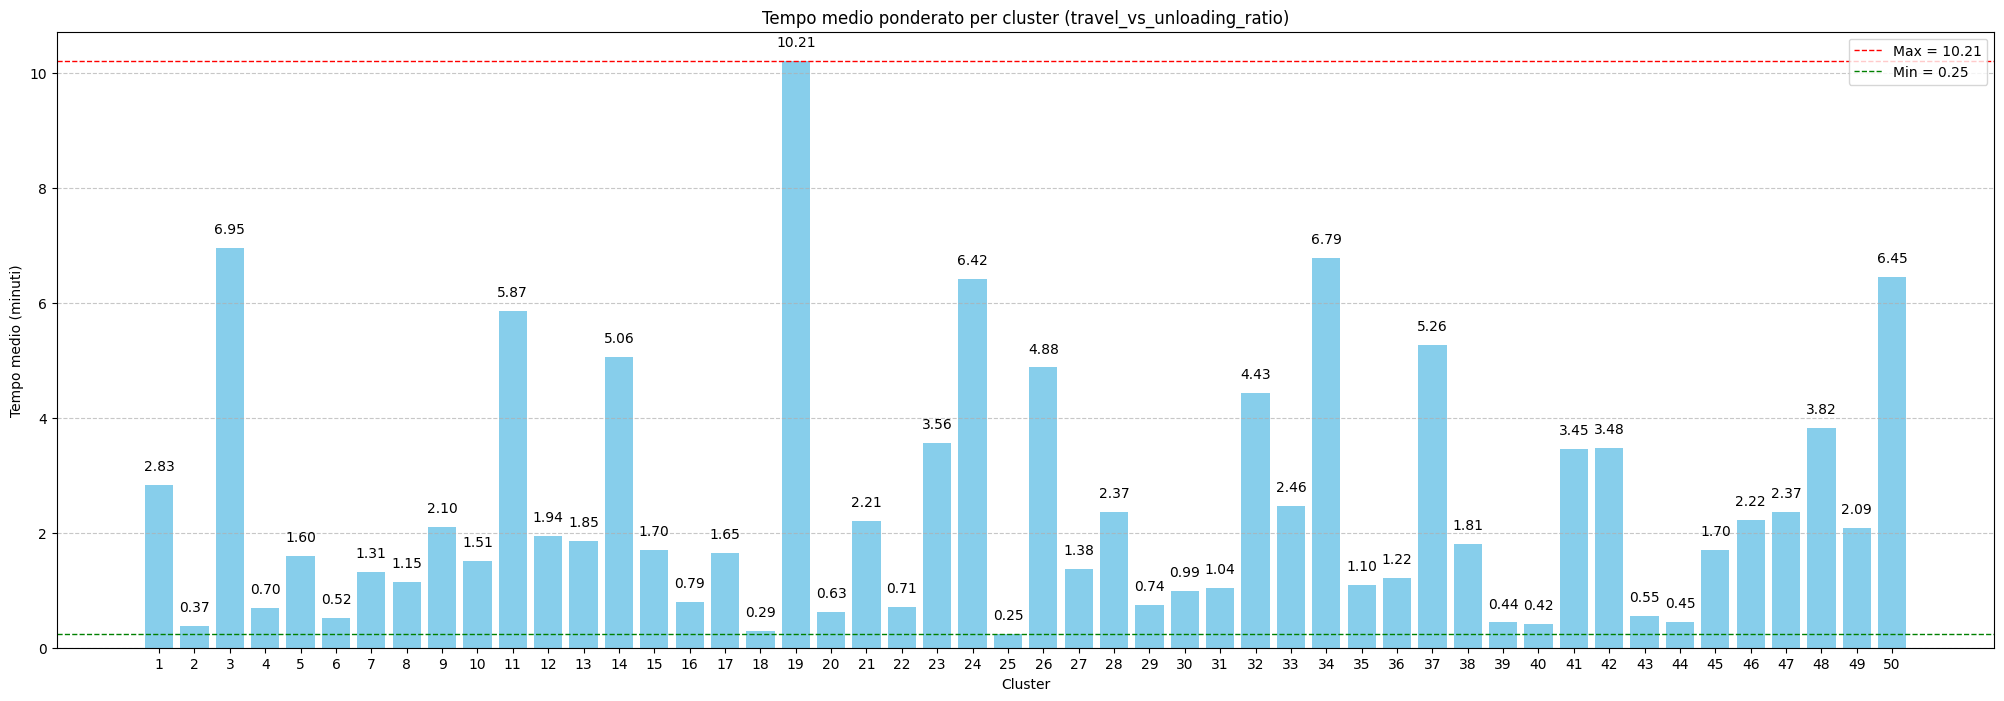

In [118]:
# =========================
# Bar plot: travel_vs_unloading_ratio ponderata per n_days per cluster
# =========================

# Calcolo media ponderata: (travel_vs_unloading_ratio * n_days) / n_days totali per cluster
travel_vs_unloading_ratio_weighted = (
    df_filtered.groupby("cluster_num")
    .apply(lambda x: (x["travel_vs_unloading_ratio"] * x["n_days"]).sum() / x["n_days"].sum())
    .reset_index(name="weighted_travel_vs_unloading_ratio")
)

plt.figure(figsize=(25,8))

x = travel_vs_unloading_ratio_weighted["cluster_num"]
y = travel_vs_unloading_ratio_weighted["weighted_travel_vs_unloading_ratio"]

bars = plt.bar(x, y, color='skyblue')

# Etichette sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{(height):.2f}',
             ha='center', va='bottom', fontsize=10)

# Riga orizzontale: massimo
max_val = y.max()
plt.axhline(max_val, color='r', linestyle='dashed', linewidth=1, label=f'Max = {max_val:.2f}')
min_val = y.min()
plt.axhline(min_val, color='g', linestyle='dashed', linewidth=1, label=f'Min = {min_val:.2f}')
plt.legend(loc='upper right')

plt.xlabel("Cluster")
plt.ylabel("Tempo medio (minuti)")
plt.title("Tempo medio ponderato per cluster (travel_vs_unloading_ratio)")
plt.xticks(x, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Ratio < 1

In [119]:
#stampa quando travel_vs_unloading_ratio <1
print("Cluster con travel_vs_unloading_ratio < 1:")
print("-" * 40)
for _, row in travel_vs_unloading_ratio_weighted[travel_vs_unloading_ratio_weighted['weighted_travel_vs_unloading_ratio'] < 1].iterrows():
    print(f"Cluster {row['cluster_num']}: {row['weighted_travel_vs_unloading_ratio']:.2f}")


Cluster con travel_vs_unloading_ratio < 1:
----------------------------------------
Cluster 2.0: 0.37
Cluster 4.0: 0.70
Cluster 6.0: 0.52
Cluster 16.0: 0.79
Cluster 18.0: 0.29
Cluster 20.0: 0.63
Cluster 22.0: 0.71
Cluster 25.0: 0.25
Cluster 29.0: 0.74
Cluster 30.0: 0.99
Cluster 39.0: 0.44
Cluster 40.0: 0.42
Cluster 43.0: 0.55
Cluster 44.0: 0.45


In [120]:
# in quale giorno e per quale cluster il tempo medio supera 480 min?
#df[df["max_minutes"] > 480][["n_days", "cluster", "max_minutes"]]
#df[df["mean_overtime_minutes"] > 0][["n_days", "cluster", "mean_minutes", "mean_overtime_minutes"]]
print("Giorni con overtime:")
df[df["n_overtime_days"] > 0][["n_days", "cluster", "mean_minutes", "n_overtime_days", "mean_overtime_minutes", "max_minutes"]]

Giorni con overtime:


,n_days,cluster,mean_minutes,n_overtime_days,mean_overtime_minutes,max_minutes
33,29,Cluster 16,448.827586,12,30.666667,544.0
35,28,Cluster 16,203.000000,1,133.000000,613.0
36,28,Cluster 16,589.678571,26,124.576923,749.0
43,29,Cluster 18,411.379310,8,42.750000,614.0
44,29,Cluster 18,400.344828,5,29.200000,536.0
45,28,Cluster 18,311.750000,1,123.000000,603.0
46,28,Cluster 18,527.178571,22,99.090909,701.0
52,29,Cluster 2,467.793103,15,60.466667,633.0
53,29,Cluster 2,358.931034,3,65.000000,584.0
54,28,Cluster 2,367.892857,3,20.666667,510.0


# Statistiche: Identificazione delle performance per giorno

In [121]:
# =========================
# 1. Indicatori di efficienza
# =========================
df["service_time"] = df["mean_travel_time_min"] + df["mean_unloading_time_min"]
df["km_per_delivery"] = df["mean_distance_m"] / df["mean_num_deliveries"]
df["time_per_delivery"] = df["mean_minutes"] / df["mean_num_deliveries"]
df["deliveries_per_hour"] = df["mean_num_deliveries"] / (df["mean_travel_time_min"] / 60)

# =========================
# 2. Indicatori di stabilità
# =========================
df["var_minutes"] = (df["max_minutes"] - df["min_minutes"]) / df["mean_minutes"]
df["var_distance"] = (df["max_distance_m"] - df["min_distance_m"]) / df["mean_distance_m"]
df["var_deliveries"] = (df["max_num_deliveries"] - df["min_num_deliveries"]) / df["mean_num_deliveries"]

# =========================
# 3. Normalizzazione
# =========================
metrics_to_normalize = [
    "service_time", "km_per_delivery", "time_per_delivery", "deliveries_per_hour",
    "var_minutes", "var_distance", "var_deliveries", "n_days"
]

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[metrics_to_normalize]), columns=metrics_to_normalize)

# invertiamo le metriche dove più basso = meglio
for col in ["service_time", "km_per_delivery", "time_per_delivery", "var_minutes", "var_distance", "var_deliveries"]:
    df_norm[col] = 1 - df_norm[col]

# sostituiamo nel dataframe originale
for col in metrics_to_normalize:
    df[f"{col}_norm"] = df_norm[col]

# =========================
# 4. Score finale
# =========================
df["score_efficienza"] = df[["service_time_norm", "km_per_delivery_norm", "time_per_delivery_norm", "deliveries_per_hour_norm"]].mean(axis=1)
df["score_stabilita"] = df[["var_minutes_norm", "var_distance_norm", "var_deliveries_norm"]].mean(axis=1)
df["score_frequenza"] = df["n_days_norm"]

# combinazione pesata
df["score_final"] = 0.3 * df["score_efficienza"] + 0.3 * df["score_stabilita"] + 0.3 * df["score_frequenza"]

# =========================
# 5. Risultati aggregati per cluster
# =========================
result = df.groupby("cluster")["score_final"].mean().reset_index().sort_values("score_final", ascending=False)

print(result)


       cluster  score_final
29  Cluster 36     0.760575
46   Cluster 6     0.759391
23  Cluster 30     0.758756
19  Cluster 27     0.751278
12  Cluster 20     0.750310
14  Cluster 22     0.749663
31  Cluster 38     0.748721
17  Cluster 25     0.745426
21  Cluster 29     0.743036
9   Cluster 18     0.741983
48   Cluster 8     0.741807
11   Cluster 2     0.741556
43  Cluster 49     0.740273
38  Cluster 44     0.739690
32  Cluster 39     0.737522
47   Cluster 7     0.730223
34  Cluster 40     0.729037
3   Cluster 12     0.728184
7   Cluster 16     0.727068
44   Cluster 5     0.725262
28  Cluster 35     0.723783
8   Cluster 17     0.721193
1   Cluster 10     0.720438
18  Cluster 26     0.718410
33   Cluster 4     0.718102
2   Cluster 11     0.716851
36  Cluster 42     0.702227
39  Cluster 45     0.701156
0    Cluster 1     0.701075
4   Cluster 13     0.697304
24  Cluster 31     0.697189
6   Cluster 15     0.694785
49   Cluster 9     0.692753
37  Cluster 43     0.685834
41  Cluster 47     0

In [122]:
import pandas as pd

# =========================
# 1. Tabella riassuntiva dei cluster
# =========================
# Score medio per cluster
summary = (
    df.groupby("cluster")
    .agg(
        score_mean=("score_final", "mean"),
        score_min=("score_final", "min"),
        score_max=("score_final", "max"),
        attivazioni=("n_days", "sum"),  # quante volte è stato attivo
    )
    .reset_index()
    .sort_values("score_mean", ascending=False)
)

print("\n--- Score per Cluster ---")
print(summary)

# =========================
# 2. Tabella dettagliata con le metriche chiave
# =========================
detailed = (
    df.groupby("cluster")
    .agg(
        score_mean=("score_final", "mean"),
        mean_km_per_delivery=("km_per_delivery", "mean"),
        mean_time_per_delivery=("time_per_delivery", "mean"),
        mean_service_time=("service_time", "mean"),
        var_minutes=("var_minutes", "mean"),
        var_distance=("var_distance", "mean"),
        var_deliveries=("var_deliveries", "mean"),
        total_activations=("n_days", "sum")
    )
    .reset_index()
    .sort_values("score_mean", ascending=False)
)

print("\n--- Dettaglio Metriche Chiave per Cluster ---")
print(detailed)



--- Score per Cluster ---
       cluster  score_mean  score_min  score_max  attivazioni
29  Cluster 36    0.760575   0.743635   0.779914          142
46   Cluster 6    0.759391   0.752338   0.772181          143
23  Cluster 30    0.758756   0.750398   0.771276          143
19  Cluster 27    0.751278   0.732925   0.770459          143
12  Cluster 20    0.750310   0.736166   0.772412          143
14  Cluster 22    0.749663   0.728725   0.761732          144
31  Cluster 38    0.748721   0.720172   0.766373          143
17  Cluster 25    0.745426   0.732944   0.751728          143
21  Cluster 29    0.743036   0.712215   0.764782          143
9   Cluster 18    0.741983   0.723322   0.758246          143
48   Cluster 8    0.741807   0.708436   0.758200          143
11   Cluster 2    0.741556   0.728307   0.749325          143
43  Cluster 49    0.740273   0.717641   0.748857          143
38  Cluster 44    0.739690   0.727929   0.755378          143
32  Cluster 39    0.737522   0.721024   0.7

# cluster che sforano una treshold del tempo ( in minuti)

In [123]:
# Threshold in minutes
threshold = 480

# Filter weekdays and get clusters that exceed threshold
clusters_over_threshold = df_filtered[df_filtered['mean_minutes'] > threshold]['cluster'].unique()

print(f"Clusters that exceed {threshold} minutes in at least one weekday:")
print("---------------------------------------------------")
for cluster in sorted(clusters_over_threshold):
    # Get days where this cluster exceeds threshold
    over_threshold_days = df_filtered[
        (df_filtered['cluster'] == cluster) & 
        (df_filtered['mean_minutes'] > threshold)
    ][['weekday_name', 'mean_minutes']]
    
    print(f"\n{cluster}:")
    for _, row in over_threshold_days.iterrows():
        print(f"- {row['weekday_name']}: {row['mean_minutes']:.1f} minutes")

print("\n---------------------------------------------------")
print(f"Total number of clusters exceeding {threshold} minutes: {len(clusters_over_threshold)}")

Clusters that exceed 480 minutes in at least one weekday:
---------------------------------------------------

Cluster 16:
- Fri: 589.7 minutes

Cluster 18:
- Fri: 527.2 minutes

---------------------------------------------------
Total number of clusters exceeding 480 minutes: 2


In [124]:
num_clusters_exceeding = len(clusters_over_threshold)
summary_string = f"Number of clusters exceeding {threshold} minutes: {num_clusters_exceeding}"
print(summary_string)

# Calculate number of subclusters needed for each cluster
subclusters_needed = {}

for cluster in clusters_over_threshold:
    cluster_data = df_filtered[df_filtered['cluster'] == cluster]
    max_minutes = cluster_data['mean_minutes'].max()
    num_subclusters = int(np.ceil(max_minutes/480))
    subclusters_needed[cluster] = num_subclusters
    
print("\nNumber of subclusters needed:")
for cluster, num in subclusters_needed.items():
    print(f"{cluster}: {num} subclusters")

subclusters_df = pd.DataFrame(list(subclusters_needed.items()), columns=['Cluster', 'Num_Subclusters'])


Number of clusters exceeding 480 minutes: 2

Number of subclusters needed:
Cluster 16: 2 subclusters
Cluster 18: 2 subclusters


In [125]:
# Get clusters with overtime
overtime_clusters = df[df["n_overtime_days"] > 0]

# Sort by n_overtime_days to show most problematic clusters first
overtime_clusters_sorted = overtime_clusters.sort_values("n_overtime_days", ascending=False)

# Select relevant columns for analysis
columns_to_show = [
    "cluster", 
    "weekday_name",
    "n_days",
    "mean_minutes",
    "mean_overtime_minutes",
    "n_overtime_days",
    "mean_num_deliveries",
    "mean_distance_m",
    "mean_travel_time_min",
    "mean_unloading_time_min"
]

# Display detailed information
print("=== Detailed Information for Clusters with Overtime ===")
print("\nNumber of clusters with overtime:", len(overtime_clusters_sorted["cluster"].unique()))
print("\nDetailed data:")
print(overtime_clusters_sorted[columns_to_show])

=== Detailed Information for Clusters with Overtime ===

Number of clusters with overtime: 8

Detailed data:
        cluster weekday_name  n_days  mean_minutes  mean_overtime_minutes  \
36   Cluster 16          Fri      28    589.678571             124.576923   
46   Cluster 18          Fri      28    527.178571              99.090909   
52    Cluster 2         Tues      29    467.793103              60.466667   
85   Cluster 25          Fri      28    453.857143              51.785714   
82   Cluster 25         Tues      29    454.517241              56.583333   
33   Cluster 16         Tues      29    448.827586              30.666667   
158  Cluster 39          Fri      28    434.357143              36.222222   
202  Cluster 47        Thurs      28    451.321429              19.500000   
83   Cluster 25          Wed      29    409.137931              58.000000   
43   Cluster 18         Tues      29    411.379310              42.750000   
94   Cluster 27        Thurs      28    443.

In [126]:
# Calculate mean deliveries per day for each cluster
mean_deliveries = (
    df.groupby("cluster")
    # Extract cluster number for sorting
    .agg(
        cluster_num=("cluster", lambda x: int(x.iloc[0].split()[1])),
        mean_deliveries=("mean_num_deliveries", "mean")
    )
    .sort_values("mean_deliveries", ascending=False)
)

# Print results
print("Media consegne giornaliere per cluster:")
print("---------------------------------------")
for idx, row in mean_deliveries.iterrows():
    print(f"{idx}: {row['mean_deliveries']:.2f} consegne/giorno")

Media consegne giornaliere per cluster:
---------------------------------------
Cluster 25: 32.28 consegne/giorno
Cluster 18: 30.67 consegne/giorno
Cluster 2: 27.23 consegne/giorno
Cluster 39: 22.98 consegne/giorno
Cluster 16: 21.78 consegne/giorno
Cluster 44: 21.55 consegne/giorno
Cluster 40: 20.57 consegne/giorno
Cluster 6: 17.12 consegne/giorno
Cluster 20: 16.63 consegne/giorno
Cluster 29: 15.27 consegne/giorno
Cluster 27: 13.65 consegne/giorno
Cluster 22: 13.35 consegne/giorno
Cluster 43: 11.98 consegne/giorno
Cluster 8: 10.32 consegne/giorno
Cluster 30: 10.28 consegne/giorno
Cluster 9: 9.10 consegne/giorno
Cluster 4: 8.48 consegne/giorno
Cluster 12: 8.21 consegne/giorno
Cluster 35: 8.11 consegne/giorno
Cluster 47: 8.00 consegne/giorno
Cluster 5: 8.00 consegne/giorno
Cluster 36: 7.74 consegne/giorno
Cluster 15: 7.10 consegne/giorno
Cluster 13: 6.38 consegne/giorno
Cluster 17: 6.32 consegne/giorno
Cluster 21: 6.16 consegne/giorno
Cluster 49: 6.13 consegne/giorno
Cluster 28: 5.92 con

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nicco\AppData\Local\Temp\ipykernel_24288\2747617741.py:5: SyntaxWarning: invalid escape sequence '\d'
  high_travel_ratio['cluster_num'] = high_travel_ratio['cluster'].str.extract('(\d+)').astype(int)


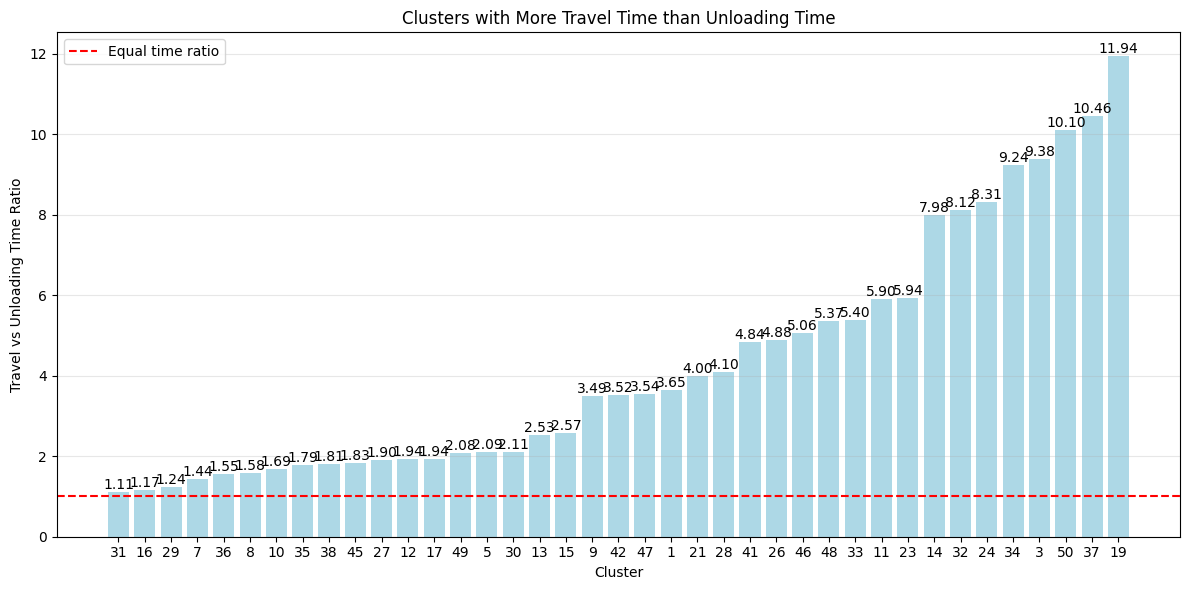


Summary of clusters with high travel ratio:
Number of clusters with ratio > 1: 39
Maximum ratio: 11.94
Minimum ratio: 1.11
Mean ratio: 4.30


In [127]:
# Filter clusters with travel_vs_unloading_ratio > 1
high_travel_ratio = df[df['travel_vs_unloading_ratio'] > 1].copy()

# Extract cluster numbers for sorting
high_travel_ratio['cluster_num'] = high_travel_ratio['cluster'].str.extract('(\d+)').astype(int)

# Calculate mean ratio per cluster
cluster_means = (high_travel_ratio.groupby('cluster_num')
                ['travel_vs_unloading_ratio'].mean()
                .sort_values(ascending=True))

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(cluster_means)), cluster_means.values, color='lightblue')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Customize plot
plt.axhline(y=1, color='r', linestyle='--', label='Equal time ratio')
plt.xticks(range(len(cluster_means)), cluster_means.index)
plt.xlabel('Cluster')
plt.ylabel('Travel vs Unloading Time Ratio')
plt.title('Clusters with More Travel Time than Unloading Time')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of clusters with high travel ratio:")
print(f"Number of clusters with ratio > 1: {len(cluster_means)}")
print(f"Maximum ratio: {cluster_means.max():.2f}")
print(f"Minimum ratio: {cluster_means.min():.2f}")
print(f"Mean ratio: {cluster_means.mean():.2f}")

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nicco\AppData\Local\Temp\ipykernel_24288\3856031427.py:5: SyntaxWarning: invalid escape sequence '\d'
  low_travel_ratio['cluster_num'] = low_travel_ratio['cluster'].str.extract('(\d+)').astype(int)


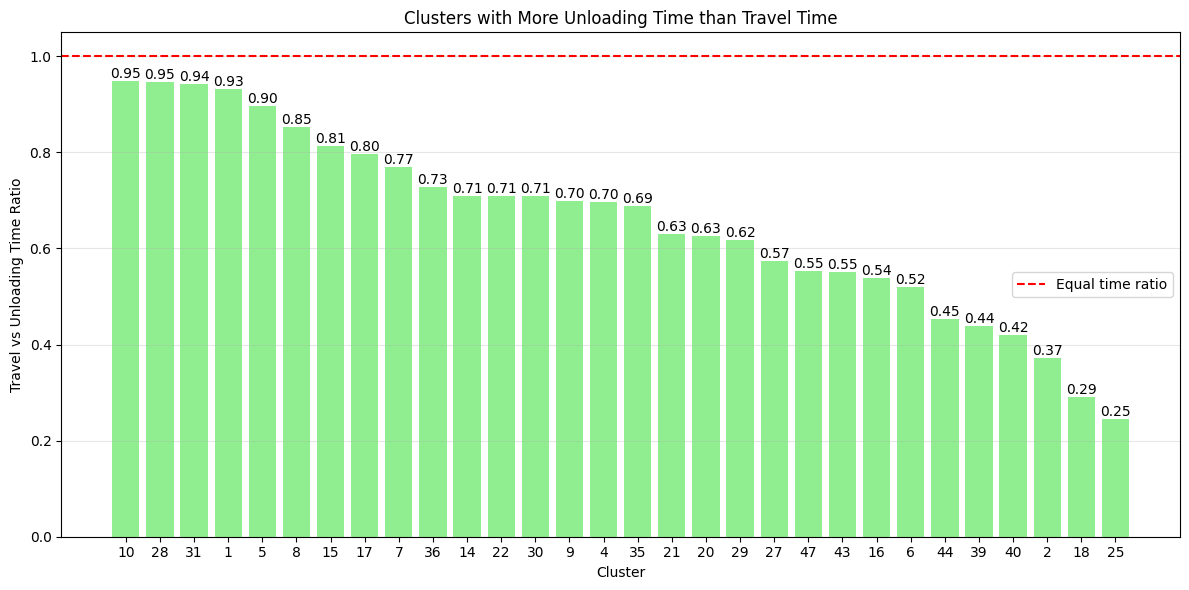


Summary of clusters with low travel ratio:
Number of clusters with ratio < 1: 30
Maximum ratio: 0.95
Minimum ratio: 0.25
Mean ratio: 0.66


In [128]:
# Filter clusters with travel_vs_unloading_ratio < 1
low_travel_ratio = df[df['travel_vs_unloading_ratio'] < 1].copy()

# Extract cluster numbers for sorting
low_travel_ratio['cluster_num'] = low_travel_ratio['cluster'].str.extract('(\d+)').astype(int)

# Calculate mean ratio per cluster
cluster_means = (low_travel_ratio.groupby('cluster_num')
                ['travel_vs_unloading_ratio'].mean()
                .sort_values(ascending=False))

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(cluster_means)), cluster_means.values, color='lightgreen')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Customize plot
plt.axhline(y=1, color='r', linestyle='--', label='Equal time ratio')
plt.xticks(range(len(cluster_means)), cluster_means.index)
plt.xlabel('Cluster')
plt.ylabel('Travel vs Unloading Time Ratio')
plt.title('Clusters with More Unloading Time than Travel Time')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of clusters with low travel ratio:")
print(f"Number of clusters with ratio < 1: {len(cluster_means)}")
print(f"Maximum ratio: {cluster_means.max():.2f}")
print(f"Minimum ratio: {cluster_means.min():.2f}")
print(f"Mean ratio: {cluster_means.mean():.2f}")

# Giorni con overtime

In [129]:
overtime_days = df[df["n_overtime_days"] > 0][["cluster", "weekday_name", "n_overtime_days", "mean_overtime_minutes"]]
print("Giorni con overtime per cluster:")
print(overtime_days)

summary_overtime = df[df["n_overtime_days"] > 0].groupby('cluster').agg({
    'n_days': 'sum',
    'n_overtime_days': 'sum',
    'mean_overtime_minutes': 'mean'
}).reset_index()

print("Riepilogo overtime per cluster:")
print(summary_overtime)



Giorni con overtime per cluster:
        cluster weekday_name  n_overtime_days  mean_overtime_minutes
33   Cluster 16         Tues               12              30.666667
35   Cluster 16        Thurs                1             133.000000
36   Cluster 16          Fri               26             124.576923
43   Cluster 18         Tues                8              42.750000
44   Cluster 18          Wed                5              29.200000
45   Cluster 18        Thurs                1             123.000000
46   Cluster 18          Fri               22              99.090909
52    Cluster 2         Tues               15              60.466667
53    Cluster 2          Wed                3              65.000000
54    Cluster 2        Thurs                3              20.666667
55    Cluster 2          Fri                3              17.000000
82   Cluster 25         Tues               12              56.583333
83   Cluster 25          Wed                8              58.000000
8

## Graficare overtime

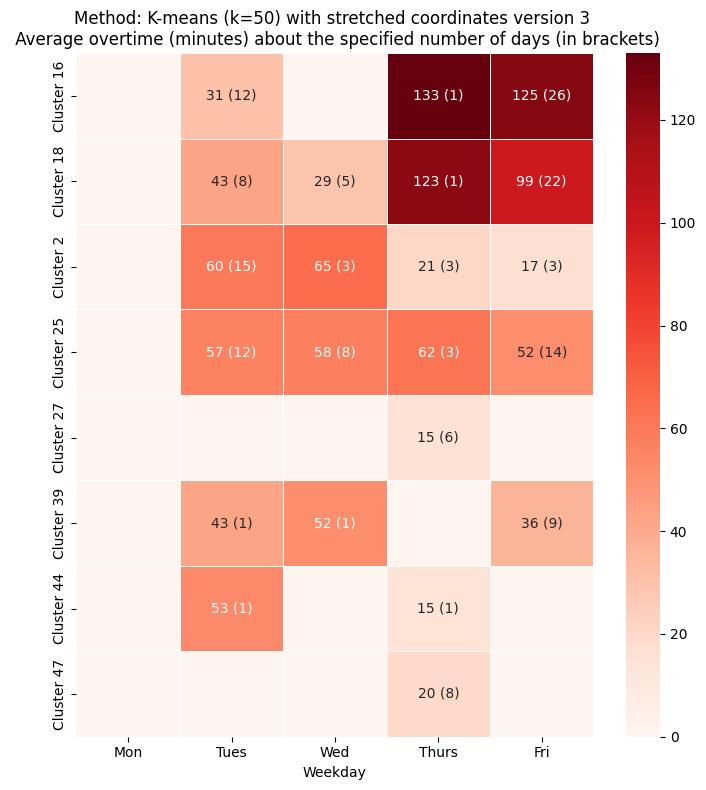

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assumiamo che df abbia le colonne: cluster, weekday_name, n_overtime_days, mean_overtime_minutes

# 1. Considera solo i cluster/giorno dove almeno un overtime è avvenuto
overtime_by_day = df[df["n_overtime_days"] > 0].copy()

# 2. Raggruppa per cluster e giorno della settimana:
agg = overtime_by_day.groupby(['cluster', 'weekday_name']).agg({
    'n_overtime_days': 'sum',
    'mean_overtime_minutes': 'mean'
}).reset_index()


# 4. Pivot: cluster come righe, giorno come colonne
heatmap_minutes = agg.pivot(index='cluster', columns='weekday_name', values='mean_overtime_minutes').reindex(columns=giorni_ordine).fillna(0)
heatmap_days = agg.pivot(index='cluster', columns='weekday_name', values='n_overtime_days').reindex(columns=giorni_ordine).fillna(0)

# 5. Crea annotazioni: "minuti (giorni)", vuoto se entrambi sono zero
annot = heatmap_minutes.round(0).astype(int).astype(str) + " (" + heatmap_days.astype(int).astype(str) + ")"
mask_zero = (heatmap_minutes == 0) & (heatmap_days == 0)
annot = annot.mask(mask_zero, '')

# 6. Plot heatmap
plt.figure(figsize=(7, 8))
sns.heatmap(
    heatmap_minutes,
    cmap='Reds',
    annot=annot,
    fmt='',
    linewidths=.5
)

plt.title(f"Method: {method_name} \n Average overtime (minutes) about the specified number of days (in brackets)")
plt.xlabel('Weekday')
plt.ylabel('')
plt.tight_layout()
plt.show()
